<a href="https://colab.research.google.com/github/marcocarrillodiaz/BEDU-Modulo-4/blob/main/Proyecto_BEDU_Modulo4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediccion del precio del Bitcoin**


**¿Qué es el bitcoin?**

R1: Es una divisa digital de pago descentralizada «peer-to-peer», impulsada por sus usuarios sin ninguna autoridad central o intermediarios.

R2: Es una criptomoneda descentralizada que puede enviarse de un usuario a otro mediante la red bitcoin peer-to-peer sin necesidad de intermediarios. Las transacciones son verificadas y registradas en un libro de contabilidad público distribuido llamado blockchain.

*A pesar de la polémica que rodea la historia del Bitcoin y su futuro, es innegable que este se ha convertido en un interesante fenomeno a modelar.*

**Se pretende mediante la guia de los postwork, obtener los datos históricos del valor del Bicoin y mediante el analisis posterior de series de tiempo determinar la factibilidad de preveer el precio del Bitcoin.**

Los datos inciales se han extraido del sitio: https://mx.investing.com/crypto/bitcoin/historical-data.

# 1. Como primer paso leemos el archivo csv en un Dataframe

In [228]:
!pip install cryptocmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [229]:
# Tratamiento de Datos
import pandas as pd
import numpy as np
import datetime
from cryptocmd import CmcScraper
import matplotlib.pyplot as plt

In [230]:
df = pd.read_csv("/content/drive/MyDrive/BEDU/Modulo3/Histórico del Bitcoin Evolución del BTC - Investing.com México.csv")
df.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
0,20.07.2022,"24,140.9","23,412.0","24,258.0","22,965.9",281.98K,3.12%
1,19.07.2022,"23,410.2","22,529.3","23,757.3","21,581.8",308.91K,3.93%
2,18.07.2022,"22,525.8","20,785.6","22,714.9","20,770.6",279.72K,8.37%
3,17.07.2022,"20,785.6","21,209.8","21,654.4","20,755.2",132.81K,-2.00%
4,16.07.2022,"21,209.9","20,825.2","21,561.3","20,484.4",136.89K,1.85%


In [231]:
df.tail()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
4381,22.07.2010,0.1,0.1,0.1,0.1,2.16K,0.00%
4382,21.07.2010,0.1,0.1,0.1,0.1,0.58K,0.00%
4383,20.07.2010,0.1,0.1,0.1,0.1,0.26K,0.00%
4384,19.07.2010,0.1,0.1,0.1,0.1,0.57K,0.00%
4385,18.07.2010,0.1,0.0,0.1,0.1,0.08K,0.00%


# **Datos**
Se observan 7 columnas y un total al día 20 de Julio de 2022 un total de 4385 registros.

**Para un primer analisis se usaran estos datos de forma inicial, posteriormente se consultaran en línea**

---

La información de cada columna es:

***Fecha***: Fecha del Registro

***Cierre***: precio de cierre, precio al que cotiza el Bitcoin a la finalización del día, (USD).

***Apertura***: precio de apertura, precio al que cotiza un activo, en este caso el Bitcoin, en el comienzo del día. Expresado en dólares estadounidenses (USD).

***Máximo***: precio máximo del día, precio más alto alcanzado por el Bitcoin en ese día, (USD).

***Mínimo***: precio mínimo del día, precio más bajo alcanzado por el Bitcoin en ese día, (USD).

***Vol.***: volumen, suma de las operaciones reales realizadas durante el día, (USD).

***% var.***: Porcentaje de variación de las operaciones del día.

---

*Nota: el mercado de las criptomonedas es un mercado ininterrumpido, opera las 24 horas del día, los 7 días de la semana. De todas maneras, no es estrictamente necesario que el precio close coincida con el precio open del día siguiente debido a las fluctuaciones que pueda sufrir el valor de Bitcoin, o cualquier criptomoneda, durante el último segundo del día.*

---

# Limpieza de Datos

Se Realizarán las siguientes tareas:

1. Limpiar nuestro dataset de NaNs.
2. Reindexar, si es necesario.
3. Renombrar columnas si es necesario.
4. Aplicación de agregaciones para explorar nuestro dataset.




In [232]:
# 1. Verificando la existencia de nulos
df.isna().sum() 

Fecha       0
Cierre      0
Apertura    0
Máximo      0
Mínimo      0
Vol.        0
% var.      0
dtype: int64

In [233]:
# Al no existir, no se realizan tareas como: df.dropna() o df.fillna() 

In [234]:
# 2. Reindexar
df.reset_index().tail()

,index,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
4381,4381,22.07.2010,0.1,0.1,0.1,0.1,2.16K,0.00%
4382,4382,21.07.2010,0.1,0.1,0.1,0.1,0.58K,0.00%
4383,4383,20.07.2010,0.1,0.1,0.1,0.1,0.26K,0.00%
4384,4384,19.07.2010,0.1,0.1,0.1,0.1,0.57K,0.00%
4385,4385,18.07.2010,0.1,0.0,0.1,0.1,0.08K,0.00%


In [235]:
# El resultado es consistente con el numero de filas y columnas, por lo que no es necesario 
df.reset_index().shape

(4386, 8)

In [236]:
# 3. Renombrando columnas: Eliminaremos caracteres especiales como acentos, puntuación y simpbolos de porcentaje.
# Mapeamos los nombres con los nuevos:
column_name_mapping = {
    "Fecha" : "fecha",
    "Apertura" : "apertura",
    "Cierre" : "cierre",
    "Máximo" : "maximo",
    "Mínimo" : "minimo",
    "Vol." : "volumen",
    "% var." : "porcentaje_var"
} 

df = df.rename(columns = column_name_mapping)
df.head()

,fecha,cierre,apertura,maximo,minimo,volumen,porcentaje_var
0,20.07.2022,"24,140.9","23,412.0","24,258.0","22,965.9",281.98K,3.12%
1,19.07.2022,"23,410.2","22,529.3","23,757.3","21,581.8",308.91K,3.93%
2,18.07.2022,"22,525.8","20,785.6","22,714.9","20,770.6",279.72K,8.37%
3,17.07.2022,"20,785.6","21,209.8","21,654.4","20,755.2",132.81K,-2.00%
4,16.07.2022,"21,209.9","20,825.2","21,561.3","20,484.4",136.89K,1.85%


In [237]:
df.dtypes

fecha             object
cierre            object
apertura          object
maximo            object
minimo            object
volumen           object
porcentaje_var    object
dtype: object

In [238]:
df["fecha"]=df["fecha"].str.replace('.','-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [239]:
df["fecha"]=pd.to_datetime(df["fecha"])

In [240]:
# Le daremos formato a cada uno de los campos
#df["fecha"]=pd.to_datetime(df["fecha"], format='%Y-%m-%d %H:%M:%S')

In [241]:
# Formateamos el campo "cierre"
df["cierre"]=pd.to_numeric(df["cierre"].str.replace(",", ""))

In [242]:
# Formateamos el campo apertura"
df["apertura"]=pd.to_numeric(df["apertura"].str.replace(",", ""))

In [243]:
# Formateamos el campo "maximo"
df["maximo"]=pd.to_numeric(df["maximo"].str.replace(",", ""))

In [244]:
# Formateamos el campo "minimo"
df["minimo"]=pd.to_numeric(df["minimo"].str.replace(",", ""))

In [245]:
# Formateamos el campo "volumen"
df["volumen"]=pd.to_numeric(df["volumen"].str.replace(".", "").str.replace("K", "000").str.replace("M", "000000").str.replace("B", "000000000").str.replace("-", "0"))*1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [246]:
df['porcentaje_var']=pd.to_numeric(df['porcentaje_var'].str.replace("%", ""))/100

In [247]:
df.dtypes

fecha             datetime64[ns]
cierre                   float64
apertura                 float64
maximo                   float64
minimo                   float64
volumen                  float64
porcentaje_var           float64
dtype: object

**Creamos un nuevo Data Frame con los datos fianles a tratar**

In [248]:

data = df.loc[:,['fecha', 'apertura', 'cierre', 'maximo', 'minimo']]
data.head()

,fecha,apertura,cierre,maximo,minimo
0,2022-07-20,23412.0,24140.9,24258.0,22965.9
1,2022-07-19,22529.3,23410.2,23757.3,21581.8
2,2022-07-18,20785.6,22525.8,22714.9,20770.6
3,2022-07-17,21209.8,20785.6,21654.4,20755.2
4,2022-07-16,20825.2,21209.9,21561.3,20484.4


**Para propositos de ordenamiento por fecha, asignamos el campo fecha como indice y ordenamos**

Establecimos una frecuencia con el método asfreq por día: 'D', de este modo *Pandas* completará los huecos que puedan existir en la serie temporal con el valor NaN

In [249]:
data = data.set_index("fecha")
data = data.asfreq('D')
data = data.sort_index()
data.tail()

,apertura,cierre,maximo,minimo
fecha,,,,
2022-12-03,38730.2,38814.3,39355.3,38666.5
2022-12-04,39507.0,40078.0,40678.0,39265.0
2022-12-05,29073.4,28976.0,30136.7,26500.5
2022-12-06,28404.0,26606.3,28534.8,26606.3
2022-12-07,19963.2,19330.9,20051.7,19279.6


In [250]:
# comprobamos si han aparecido NaN's tras la transformación.
print(f'Número de filas con missing values: {data.isna().any(axis=1).mean()}')

Número de filas con missing values: 0.07017171931312274


#**Por no ser un valor cero la media calculada, reducimos el intervalo de muestra ya que estamos encontrado espacios entre días**

Empezamos a recurrir a la librería **cryptocmd** para descargar los valores.

*Nota: Se buscó una API que nos regresara los valores históricos, pero al tratarse de un volumen importante de datos, todas las opciones que se encontraron se encontraban limitadas, por lo que se optó por esta libreria para la obtención en línea de los* 

In [251]:
from datetime import date
hoy_str=date.today().strftime('%d-%m-%Y')
fecha_inicio='28-04-2013'
fecha_fin=hoy_str

In [252]:
# Descarga de datos
# Se inicializa el Scraper, se incluye simbolo, inicio y fin de la descarga
scraper = CmcScraper('BTC', fecha_inicio, fecha_fin)

# Transformar datos recogidos en un dataframe
df2 = scraper.get_dataframe()
df2.sort_values(by='Date', ascending=True, inplace=True)

#pd.set_option('display.max_columns', None)
display(df2)
#pd.reset_option('display.max_columns')

,Date,Open,High,Low,Close,Volume,Market Cap
3412,2013-04-28,135.300003,135.979996,132.100006,134.210007,0.000000e+00,1.488567e+09
3411,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09
3410,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09
3409,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09
3408,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09
...,...,...,...,...,...,...,...
4,2022-08-27,20262.480311,20340.774564,19890.523328,20041.738453,3.011673e+10,3.834785e+11
3,2022-08-28,20041.034804,20139.054233,19616.814984,19616.814984,2.436681e+10,3.753674e+11
2,2022-08-29,19615.153363,20357.463233,19600.785035,20297.994635,3.263785e+10,3.884220e+11
1,2022-08-30,20298.612081,20542.644970,19617.640950,19796.809402,3.448336e+10,3.788507e+11


# Volvemos a tratar los datos

Al tratarse de un Dataset similar, lo unico que cambia son los nombres de algunas columnas, por lo que renombramos el Data Frame final.

In [253]:
# Mapeamos los nombres con los nuevos:
column_name_mapping_2 = {
    "Date" : "fecha",
    "Open" : "apertura",
    "Close" : "cierre",
    "High" : "maximo",
    "Low" : "minimo",
    "VolVolume" : "volumen",
    "Market Cap" : "market_cap"
}
df2 = df2.rename(columns = column_name_mapping_2)
df2.head()

,fecha,apertura,maximo,minimo,cierre,Volume,market_cap
3412,2013-04-28,135.300003,135.979996,132.100006,134.210007,0.0,1.488567e+09
3411,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09
3410,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09
3409,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09
3408,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09


In [254]:
df2['fecha'] = pd.to_datetime(df2['fecha'], format='%Y-%m-%d %H:%M:%S')
data2 = df2.loc[:, ['fecha', 'apertura', 'cierre', 'maximo', 'minimo']]
data2 = data2.set_index('fecha')
data2 = data2.asfreq('D')
data2 = data2.sort_index()

In [255]:
# comprobamos si han aparecido NaN's tras la transformación.
print(f'Número de filas con missing values: {data2.isna().any(axis=1).mean()}')

Número de filas con missing values: 0.0


# **Introducción de variables exogenas**

Una serie temporal (ts) es una sucesión de datos ordenados cronológicamente y espaciados a intervalos iguales o desiguales.

El proceso de ***forecasting*** consiste en predecir el valor futuro de una serie temporal, bien modelando la serie únicamente en función de su comportamiento pasado o empleando otras variables adicionales.

La premisa a validar es la siguiente:

***Forecast = patrones + varianza_no_explicada***

Es decir: *el comportamiento futuro de un fenómeno se puede explicar a partir de su comportamiento pasado*

# **Halving como variable exogena**

El Halving es un evento programado y forma parte del diseño y funcionamiento de algunas criptomonedas. Los mineros se dedican a validar los bloques de transacciones de la red, en este caso Bitcoin, y, cada vez que lo logran, reciben como recompensa una cantidad de esa moneda digital. **Esta cantidad es fija pero solo durante un tiempo.**

*En la historia de Bitcoin han existido 3 halvings. Cuando se lanzó la minería de Bitcoin, los mineros recibían 50 BTC al extraer con éxito un bloque. En 2012 esta recompensa se redujo a 25 BTC, en 2016 bajó a 12,5 BTC, y en 2020 a 6,25 BTC, después del tercer halving.*



In [256]:
# Dict con la info de los halvings del Bitcoin
btc_halving = {'halving'              : [0, 1 , 2, 3, 4],
               'date'                 : ['2009-01-03', '2012-11-28', 
                                         '2016-07-09', '2020-05-11', np.nan],
               'reward'               : [50, 25, 12.5, 6.25, 3.125],
               'halving_block_number' : [0, 210000, 420000 ,630000, 840000]
              }

In [257]:
# Cálculo siguiente halving
# Se toma como base de partida los bloques restantes según la web 
# coinmarketcap.com para el próximo halving a fecha de 2022-07-20
#
bloques_restantes = 94464
bloques_por_dia = 144

dias = bloques_restantes / bloques_por_dia

next_halving = pd.to_datetime('2022-07-20', format='%Y-%m-%d') + datetime.timedelta(days=dias)
next_halving = next_halving.replace(microsecond=0, second=0, minute=0, hour=0)
next_halving = next_halving.strftime('%Y-%m-%d')

btc_halving['date'][-1] = next_halving

print(f'El próximo halving ocurrirá aproximadamente el: {next_halving}')

El próximo halving ocurrirá aproximadamente el: 2024-05-06


In [258]:
# Incluir recompensas y cuenta regresiva para próximo halving en el dataset
# 
data2['reward'] = np.nan
data2['countdown_halving'] = np.nan

for i in range(len(btc_halving['halving'])-1):
     
    # Fecha inicial y final de cada halving
    if btc_halving['date'][i] < data2.index.min().strftime('%Y-%m-%d'):
        start_date = data2.index.min().strftime('%Y-%m-%d')
    else:
        start_date = btc_halving['date'][i]
        
    end_date = btc_halving['date'][i+1]
    mask = (data2.index >= start_date) & (data2.index < end_date)
    
    # Rellenar columna 'reward' con las recompensas de minería
    data2.loc[mask, 'reward'] = btc_halving['reward'][i]
    
    # Rellenar columna 'countdown_halving' con los días restantes
    time_to_next_halving = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    
    data2.loc[mask, 'countdown_halving'] = np.arange(time_to_next_halving.days)[::-1][:mask.sum()]

In [259]:
display(data2)

,apertura,cierre,maximo,minimo,reward,countdown_halving
fecha,,,,,,
2013-04-28,135.300003,134.210007,135.979996,132.100006,25.00,1167.0
2013-04-29,134.444000,144.539993,147.488007,134.000000,25.00,1166.0
2013-04-30,144.000000,139.000000,146.929993,134.050003,25.00,1165.0
2013-05-01,139.000000,116.989998,139.889999,107.720001,25.00,1164.0
2013-05-02,116.379997,105.209999,125.599998,92.281898,25.00,1163.0
...,...,...,...,...,...,...
2022-08-27,20262.480311,20041.738453,20340.774564,19890.523328,6.25,617.0
2022-08-28,20041.034804,19616.814984,20139.054233,19616.814984,6.25,616.0
2022-08-29,19615.153363,20297.994635,20357.463233,19600.785035,6.25,615.0


In [260]:
btc_halving

{'halving': [0, 1, 2, 3, 4],
 'date': ['2009-01-03',
  '2012-11-28',
  '2016-07-09',
  '2020-05-11',
  '2024-05-06'],
 'reward': [50, 25, 12.5, 6.25, 3.125],
 'halving_block_number': [0, 210000, 420000, 630000, 840000]}

In [261]:
# Comprobar que se han creado los datos correctamente
# ==============================================================================
print('Segundo halving:', btc_halving['date'][2])
display(data2.loc['2016-07-08':'2016-07-09'])
print('')
print('Tercer halving:', btc_halving['date'][3])
display(data2.loc['2020-05-10':'2020-05-11'])
print('')
print('Próximo halving:', btc_halving['date'][4])
data2.tail(2)

Segundo halving: 2016-07-09


,apertura,cierre,maximo,minimo,reward,countdown_halving
fecha,,,,,,
2016-07-08,640.687988,666.523010,666.706970,636.466980,25.0,0.0
2016-07-09,666.383972,650.960022,666.383972,633.398987,12.5,1401.0



Tercer halving: 2020-05-11


,apertura,cierre,maximo,minimo,reward,countdown_halving
fecha,,,,,,
2020-05-10,9591.169231,8756.431142,9595.580629,8395.107451,12.50,0.0
2020-05-11,8755.535639,8601.796202,9033.471176,8374.322975,6.25,1455.0



Próximo halving: 2024-05-06


,apertura,cierre,maximo,minimo,reward,countdown_halving
fecha,,,,,,
2022-08-30,20298.612081,19796.809402,20542.64497,19617.640950,6.25,614.0
2022-08-31,19799.581316,20049.763189,20420.99042,19799.581316,6.25,613.0


In [262]:
# Gráfico de velas
#
import plotly.graph_objects as go

candlestick = go.Candlestick(
                    x     = data2.index,
                    open  = data2.apertura,
                    close = data2.cierre,
                    low   = data2.minimo,
                    high  = data2.maximo,
                    )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width       = 900,
    height      = 450,
    title       = dict(text='<b>Chart Bitcoin/USD</b>', font=dict(size=30)),
    yaxis_title = dict(text='Precio (USD)', font=dict(size=15)),
    margin      = dict(l=10, r=20, t=80, b=20),
    shapes      = [dict(x0=btc_halving['date'][2], x1=btc_halving['date'][2], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2),
                   dict(x0=btc_halving['date'][3], x1=btc_halving['date'][3], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2),
                   dict(x0=btc_halving['date'][4], x1=btc_halving['date'][4], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2)
                  ],
    annotations = [dict(x=btc_halving['date'][2], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Segundo halving'),
                   dict(x=btc_halving['date'][3], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Tercer halving'),
                   dict(x=btc_halving['date'][4], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Cuarto halving')
                  ],
    xaxis_rangeslider_visible = False,
)

fig.show()

**ESTIMADOS DE LOCACIÓN Y VARIABILIDAD**

In [263]:
# Integramos la columna promedio
data2['promedio']=(data2['maximo']-data2['minimo'])/2 + data2['minimo']

In [264]:
# Obtenemos los Promedios de las columnas: Apertura, Cierre, Maximo, Minimo y Promedio
mean_apertura=data2['apertura'].mean()
mean_cierre=data2['cierre'].mean()
mean_maximo=data2['maximo'].mean()
mean_minimo=data2['minimo'].mean()
mean_promedio=data2['promedio'].mean()

# Obtenemos medianas
median_apertura=data2['apertura'].median()
median_cierre=data2['cierre'].median()
median_maximo=data2['maximo'].median()
median_minimo=data2['minimo'].median()
median_promedio=data2['promedio'].median()

# Importamos scipy
from scipy import stats 

# Media Truncada
trim_median_apertura=stats.trim_mean(data2['apertura'], 0.1)
trim_median_cierre  =stats.trim_mean(data2['cierre'], 0.1)
trim_median_maximo  =stats.trim_mean(data2['maximo'], 0.1)
trim_median_minimo  =stats.trim_mean(data2['minimo'], 0.1)
trim_median_promedio=stats.trim_mean(data2['promedio'], 0.1)

# Desviación Estandar
std_apertura=data2['apertura'].std()
std_cierre  =data2['cierre'].std()
std_maximo  =data2['maximo'].std()
std_minimo  =data2['minimo'].std()
std_promedio=data2['promedio'].std()

# Rango
rango_apertura=data2['apertura'].max()  -data2['apertura'].min()
rango_cierre  =data2['cierre'].max()    -data2['cierre'].min()
rango_maximo  =data2['maximo'].max()    -data2['maximo'].min()
rango_minimo  =data2['minimo'].max()    -data2['minimo'].min()
rango_promedio=data2['promedio'].max()  -data2['promedio'].min()

# Percentil 25 y 75
qt25_apertura=data2['apertura'].quantile(0.25)
qt25_cierre  =data2['cierre'].quantile(0.25)
qt25_maximo  =data2['maximo'].quantile(0.25)
qt25_minimo  =data2['minimo'].quantile(0.25)
qt25_promedio=data2['promedio'].quantile(0.25)

qt75_apertura=data2['apertura'].quantile(0.75)
qt75_cierre  =data2['cierre'].quantile(0.75)
qt75_maximo  =data2['maximo'].quantile(0.75)
qt75_minimo  =data2['minimo'].quantile(0.75)
qt75_promedio=data2['promedio'].quantile(0.75)

# Rango Intercuartilico
rango_int_apertura=data2['apertura'].quantile(0.75) - data2['apertura'].quantile(0.25)
rango_int_cierre  =data2['cierre'].quantile(0.75)   - data2['cierre'].quantile(0.25)  
rango_int_maximo  =data2['maximo'].quantile(0.75)   - data2['maximo'].quantile(0.25)  
rango_int_minimo  =data2['minimo'].quantile(0.75)   - data2['minimo'].quantile(0.25)  
rango_int_promedio=data2['promedio'].quantile(0.75) - data2['promedio'].quantile(0.25)


# Resultados
resultados={
    'columnas'            : ['apertura', 'cierre', 'maximo', 'minimo', 'promedio'],
    'maximo'              : [data2['apertura'].max(),
                             data2['cierre'].max(),
                             data2['maximo'].max(),
                             data2['minimo'].max(),
                             data2['promedio'].max()],
    'minimo'              : [data2['apertura'].min(),
                             data2['cierre'].min(),
                             data2['maximo'].min(),
                             data2['minimo'].min(),
                             data2['promedio'].min()],
    'promedio'            : [mean_apertura, mean_cierre, mean_maximo, mean_minimo, mean_promedio],
    'mediana'             : [median_apertura, median_cierre, median_maximo, median_minimo, median_promedio],
    'media_truncada'      : [trim_median_apertura, trim_median_cierre, trim_median_maximo, trim_median_minimo, trim_median_promedio],
    'desviacion_estantar' : [std_apertura, std_cierre, std_maximo, std_minimo, std_promedio],
    'rango'               : [rango_apertura, rango_cierre, rango_maximo, rango_minimo, rango_promedio],
    'percentil_25'        : [qt25_apertura, qt25_cierre, qt25_maximo, qt25_minimo, qt25_promedio],
    'percentil_75'        : [qt75_apertura, qt75_cierre, qt75_maximo, qt75_minimo, qt75_promedio],
    'rango_intercuartil'  : [rango_int_apertura, rango_int_cierre, rango_int_maximo, rango_int_minimo, rango_int_promedio]
}
df_resultados=pd.DataFrame.from_dict(resultados).set_index('columnas')
df_resultados.T

columnas,apertura,cierre,maximo,minimo,promedio
maximo,67549.735581,67566.830088,68789.625939,66382.061008,67456.200347
minimo,68.504997,68.431000,74.561096,65.526001,70.590549
promedio,10809.455452,10813.904602,11089.688617,10496.409649,10793.049133
mediana,4092.136164,4105.404296,4210.049805,4006.411148,4103.562231
media_truncada,7220.797168,7227.701038,7416.671035,7003.707767,7213.023331
desviacion_estantar,15813.793077,15810.123734,16221.211772,15343.539061,15778.873783
rango,67481.230584,67498.399088,68715.064843,66316.535007,67385.609798
percentil_25,461.473999,460.498993,468.174011,452.945007,460.106003
percentil_75,10660.400391,10669.582543,10929.500000,10348.919252,10621.507662
rango_intercuartil,10198.926392,10209.083550,10461.325989,9895.974245,10161.401659


**INTRODUCCIÓN A LA VISUALIZACIÓN DE DATOS: DISTRIBUCIONES**

In [265]:
# Score de Rango Intercuartilico (IQR-Score)
# APERTURA
filtro_inferior_apertura = data2['apertura'] > qt25_apertura - (rango_int_apertura * 1.5)
filtro_superior_apertura = data2['apertura'] < qt75_apertura + (rango_int_apertura * 1.5)
df_filtrado_apertura = data2[filtro_inferior_apertura & filtro_superior_apertura]

# CIERRE
filtro_inferior_cierre = data2['cierre'] > qt25_cierre - (rango_int_cierre * 1.5)
filtro_superior_cierre = data2['cierre'] < qt75_cierre + (rango_int_cierre * 1.5)
df_filtrado_cierre = data2[filtro_inferior_cierre & filtro_superior_cierre]

# MAXIMO
filtro_inferior_maximo = data2['maximo'] > qt25_maximo - (rango_int_maximo * 1.5)
filtro_superior_maximo = data2['maximo'] < qt75_maximo + (rango_int_maximo * 1.5)
df_filtrado_maximo = data2[filtro_inferior_maximo & filtro_superior_maximo]

#MINIMO
filtro_inferior_minimo = data2['minimo'] > qt25_minimo - (rango_int_minimo * 1.5)
filtro_superior_minimo = data2['minimo'] < qt75_minimo + (rango_int_minimo * 1.5)
df_filtrado_minimo = data2[filtro_inferior_minimo & filtro_superior_minimo]

#PROMEDIO
filtro_inferior_promedio = data2['promedio'] > qt25_promedio - (rango_int_promedio * 1.5)
filtro_superior_promedio = data2['promedio'] < qt75_promedio + (rango_int_promedio * 1.5)
df_filtrado_promedio = data2[filtro_inferior_promedio & filtro_superior_promedio]

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
print('df_filtrado_apertura')
display(df_filtrado_apertura.head())
print('df_filtrado_cierre')
display(df_filtrado_cierre.head())
print('df_filtrado_maximo')
display(df_filtrado_maximo.head())
print('df_filtrado_minimo')
display(df_filtrado_minimo.head())
print('df_filtrado_promedio')
display(df_filtrado_promedio.head())

df_filtrado_apertura


,apertura,cierre,maximo,minimo,reward,countdown_halving,promedio
fecha,,,,,,,
2013-04-28,135.300003,134.210007,135.979996,132.100006,25.0,1167.0,134.040001
2013-04-29,134.444000,144.539993,147.488007,134.000000,25.0,1166.0,140.744003
2013-04-30,144.000000,139.000000,146.929993,134.050003,25.0,1165.0,140.489998
2013-05-01,139.000000,116.989998,139.889999,107.720001,25.0,1164.0,123.805000
2013-05-02,116.379997,105.209999,125.599998,92.281898,25.0,1163.0,108.940948


df_filtrado_cierre


,apertura,cierre,maximo,minimo,reward,countdown_halving,promedio
fecha,,,,,,,
2013-04-28,135.300003,134.210007,135.979996,132.100006,25.0,1167.0,134.040001
2013-04-29,134.444000,144.539993,147.488007,134.000000,25.0,1166.0,140.744003
2013-04-30,144.000000,139.000000,146.929993,134.050003,25.0,1165.0,140.489998
2013-05-01,139.000000,116.989998,139.889999,107.720001,25.0,1164.0,123.805000
2013-05-02,116.379997,105.209999,125.599998,92.281898,25.0,1163.0,108.940948


df_filtrado_maximo


,apertura,cierre,maximo,minimo,reward,countdown_halving,promedio
fecha,,,,,,,
2013-04-28,135.300003,134.210007,135.979996,132.100006,25.0,1167.0,134.040001
2013-04-29,134.444000,144.539993,147.488007,134.000000,25.0,1166.0,140.744003
2013-04-30,144.000000,139.000000,146.929993,134.050003,25.0,1165.0,140.489998
2013-05-01,139.000000,116.989998,139.889999,107.720001,25.0,1164.0,123.805000
2013-05-02,116.379997,105.209999,125.599998,92.281898,25.0,1163.0,108.940948


df_filtrado_minimo


,apertura,cierre,maximo,minimo,reward,countdown_halving,promedio
fecha,,,,,,,
2013-04-28,135.300003,134.210007,135.979996,132.100006,25.0,1167.0,134.040001
2013-04-29,134.444000,144.539993,147.488007,134.000000,25.0,1166.0,140.744003
2013-04-30,144.000000,139.000000,146.929993,134.050003,25.0,1165.0,140.489998
2013-05-01,139.000000,116.989998,139.889999,107.720001,25.0,1164.0,123.805000
2013-05-02,116.379997,105.209999,125.599998,92.281898,25.0,1163.0,108.940948


df_filtrado_promedio


,apertura,cierre,maximo,minimo,reward,countdown_halving,promedio
fecha,,,,,,,
2013-04-28,135.300003,134.210007,135.979996,132.100006,25.0,1167.0,134.040001
2013-04-29,134.444000,144.539993,147.488007,134.000000,25.0,1166.0,140.744003
2013-04-30,144.000000,139.000000,146.929993,134.050003,25.0,1165.0,140.489998
2013-05-01,139.000000,116.989998,139.889999,107.720001,25.0,1164.0,123.805000
2013-05-02,116.379997,105.209999,125.599998,92.281898,25.0,1163.0,108.940948


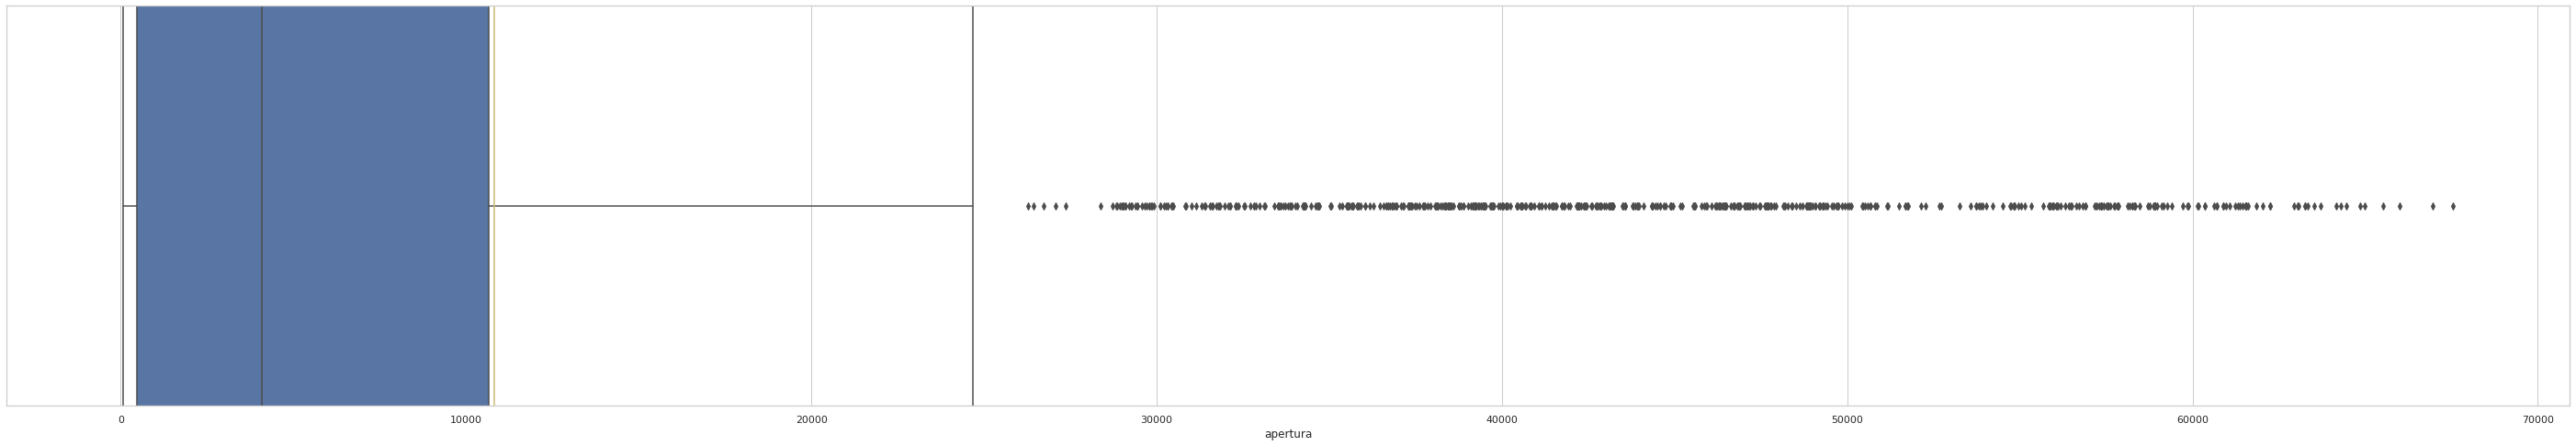

In [268]:
# Boxplot
#fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
sns.set(style='whitegrid', rc={"figure.figsize":(50,8)})
#sns.boxplot(x=data2['apertura'], ax=axes[0])
sns.boxplot(x=data2['apertura'], width=10)
#sns.boxplot(x=df_filtrado_apertura['apertura'], ax=axes[1])
plt.axvline(mean_apertura, c='y')

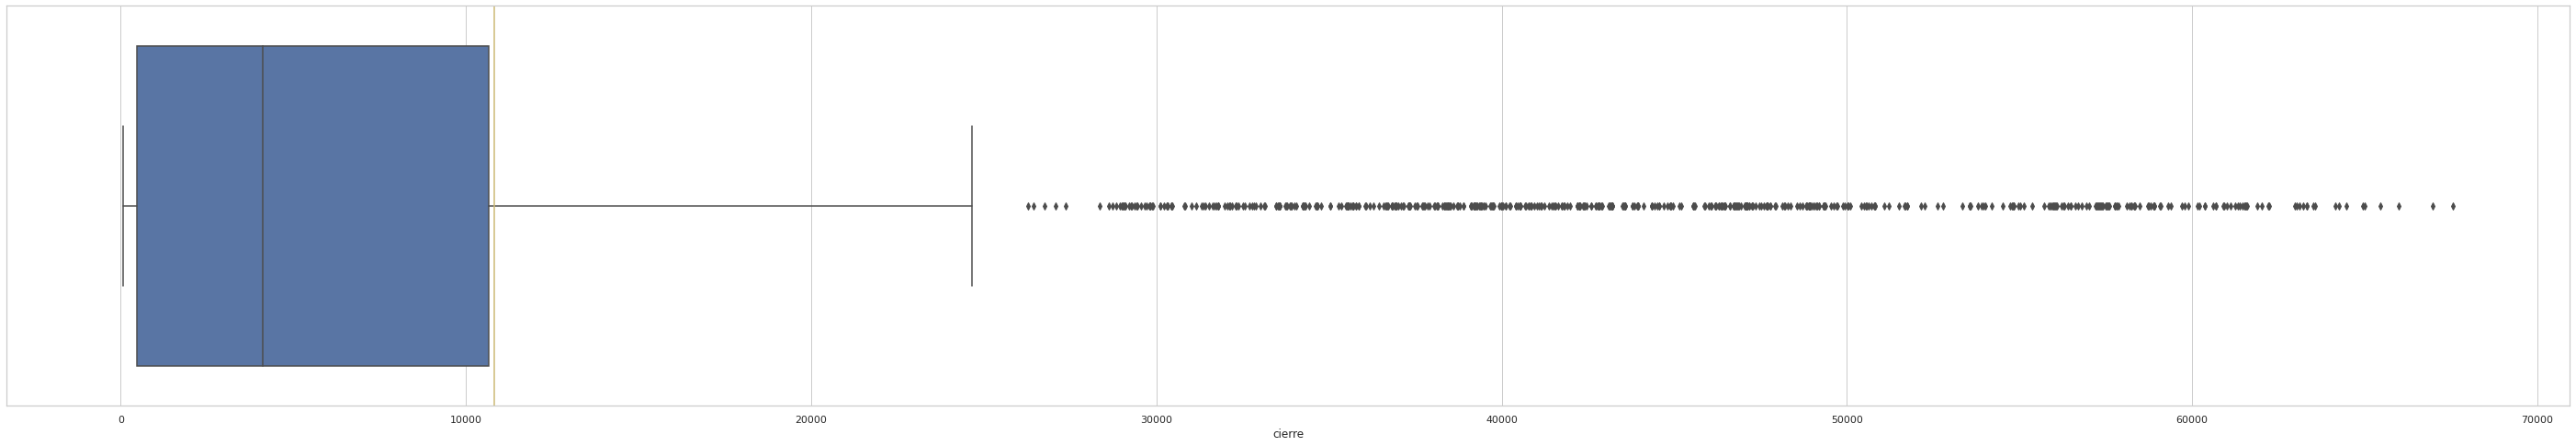

In [269]:
sns.boxplot(x=data2['cierre'])
plt.axvline(mean_cierre, c='y')

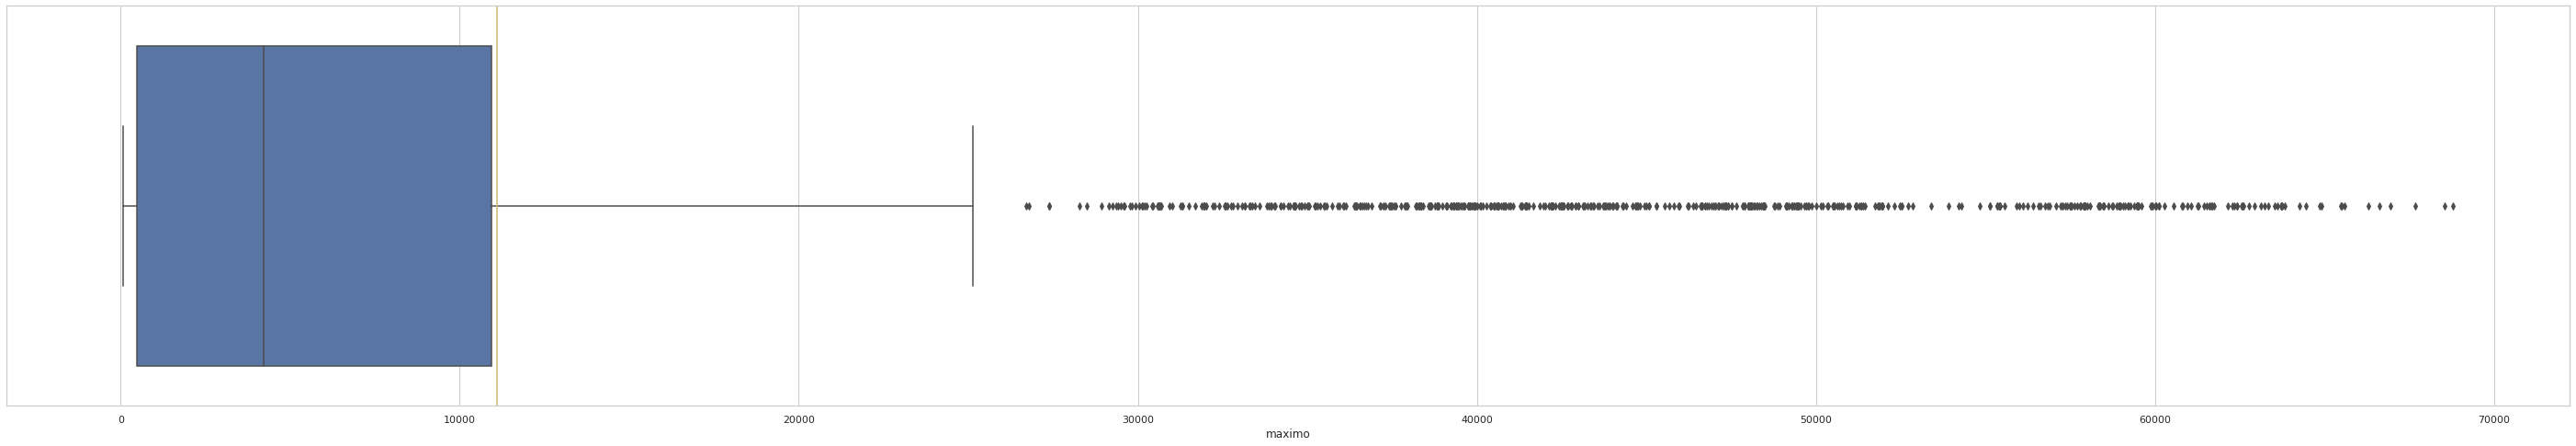

In [270]:
sns.boxplot(x=data2['maximo'])
plt.axvline(mean_maximo, c='y')

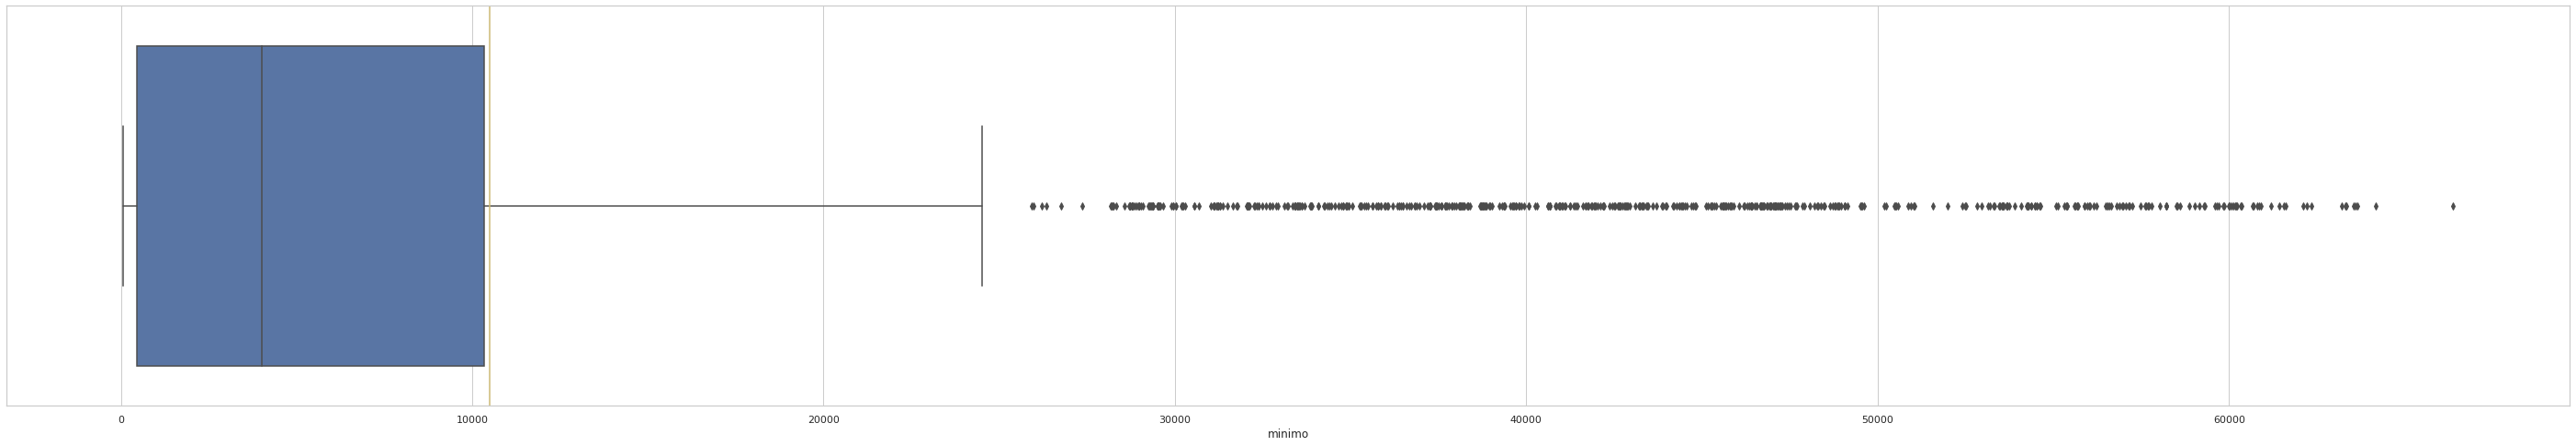

In [271]:
sns.boxplot(x=data2['minimo'])
plt.axvline(mean_minimo, c='y')

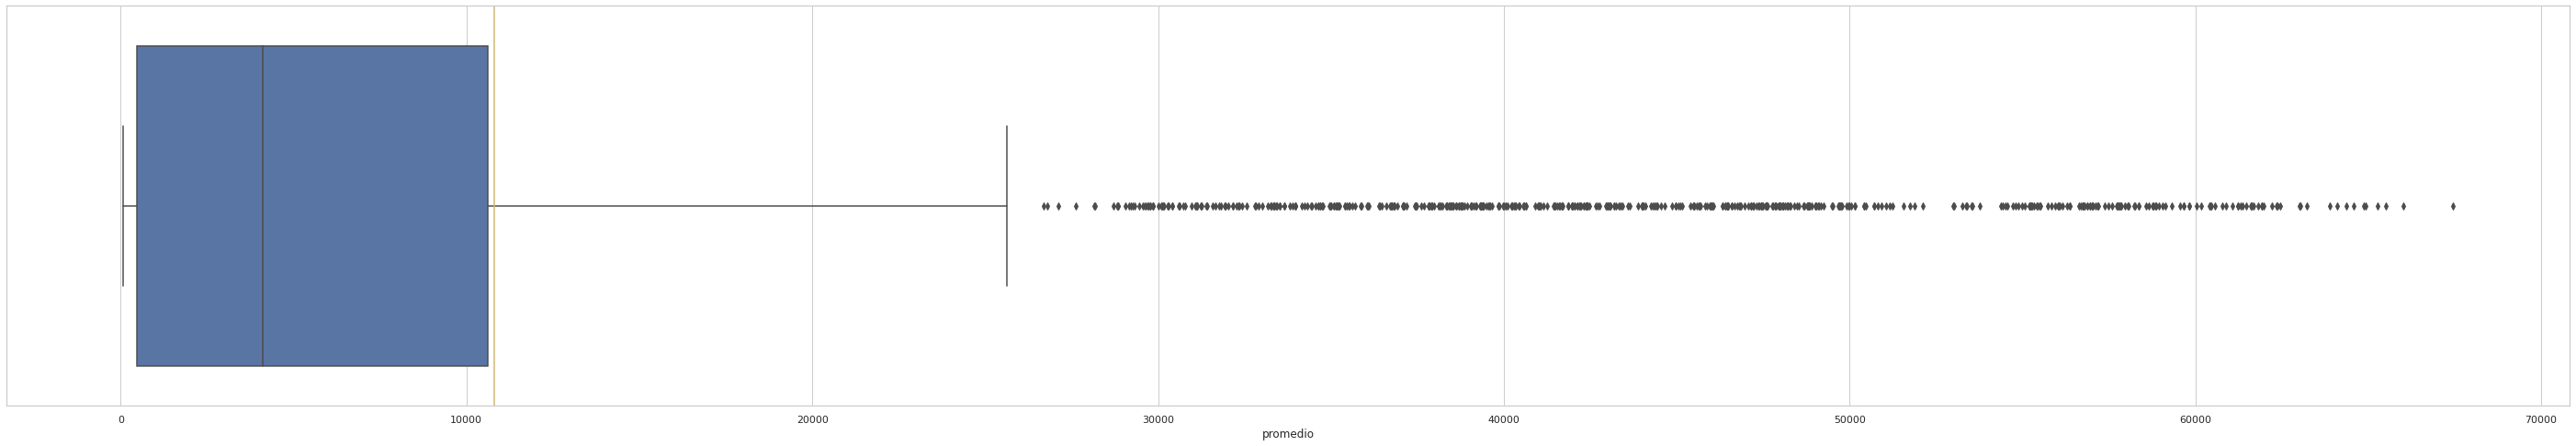

In [272]:
sns.boxplot(x=data2['promedio'])
plt.axvline(mean_promedio, c='y')

In [273]:
# SEGMENTACION  DE DATOS
segmentos = 10
apertura= data2['apertura']
cierre  = data2['cierre']
maximo  = data2['maximo']
minimo  = data2['minimo']
promedio= data2['promedio']

segmento_apertura = pd.cut(apertura, segmentos)
segmento_cierre = pd.cut(cierre, segmentos)
segmento_maximo = pd.cut(maximo, segmentos)
segmento_minimo = pd.cut(minimo, segmentos)
segmento_promedio = pd.cut(promedio, segmentos)

In [274]:
print('Segmentacion APERTURA')
display(data2['apertura'].groupby(segmento_apertura).count())

Segmentacion APERTURA


apertura
(1.024, 6816.628]         1987
(6816.628, 13564.751]      718
(13564.751, 20312.874]     103
(20312.874, 27060.997]      74
(27060.997, 33809.12]       74
(33809.12, 40557.243]      136
(40557.243, 47305.366]     128
(47305.366, 54053.489]      80
(54053.489, 60801.613]      80
(60801.613, 67549.736]      33
Name: apertura, dtype: int64

In [275]:
print('Segmentacion CIERRE')
display(data2['cierre'].groupby(segmento_cierre).count())

Segmentacion CIERRE


cierre
(0.933, 6818.271]         1986
(6818.271, 13568.111]      718
(13568.111, 20317.951]     104
(20317.951, 27067.791]      74
(27067.791, 33817.631]      76
(33817.631, 40567.47]      134
(40567.47, 47317.31]       129
(47317.31, 54067.15]        79
(54067.15, 60816.99]        80
(60816.99, 67566.83]        33
Name: cierre, dtype: int64

In [276]:
print('Segmentacion MAXIMO')
display(data2['maximo'].groupby(segmento_maximo).count())

Segmentacion MAXIMO


maximo
(5.846, 6946.068]         1983
(6946.068, 13817.574]      718
(13817.574, 20689.081]     104
(20689.081, 27560.587]      77
(27560.587, 34432.094]      66
(34432.094, 41303.6]       135
(41303.6, 48175.106]       128
(48175.106, 55046.613]      80
(55046.613, 61918.119]      89
(61918.119, 68789.626]      33
Name: maximo, dtype: int64

In [277]:
print('Segmentacion MINIMO')
display(data2['minimo'].groupby(segmento_minimo).count())

Segmentacion MINIMO


minimo
(-0.791, 6697.18]         1991
(6697.18, 13328.833]       724
(13328.833, 19960.487]      97
(19960.487, 26592.14]       72
(26592.14, 33223.794]       86
(33223.794, 39855.447]     131
(39855.447, 46487.101]     120
(46487.101, 53118.754]      81
(53118.754, 59750.408]      80
(59750.408, 66382.061]      31
Name: minimo, dtype: int64

In [278]:
print('Segmentacion PROMEDIO')
display(data2['promedio'].groupby(segmento_promedio).count())

Segmentacion PROMEDIO


promedio
(3.205, 6809.152]         1984
(6809.152, 13547.713]      721
(13547.713, 20286.273]     102
(20286.273, 27024.834]      75
(27024.834, 33763.395]      76
(33763.395, 40501.956]     135
(40501.956, 47240.517]     119
(47240.517, 53979.078]      86
(53979.078, 60717.639]      82
(60717.639, 67456.2]        33
Name: promedio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



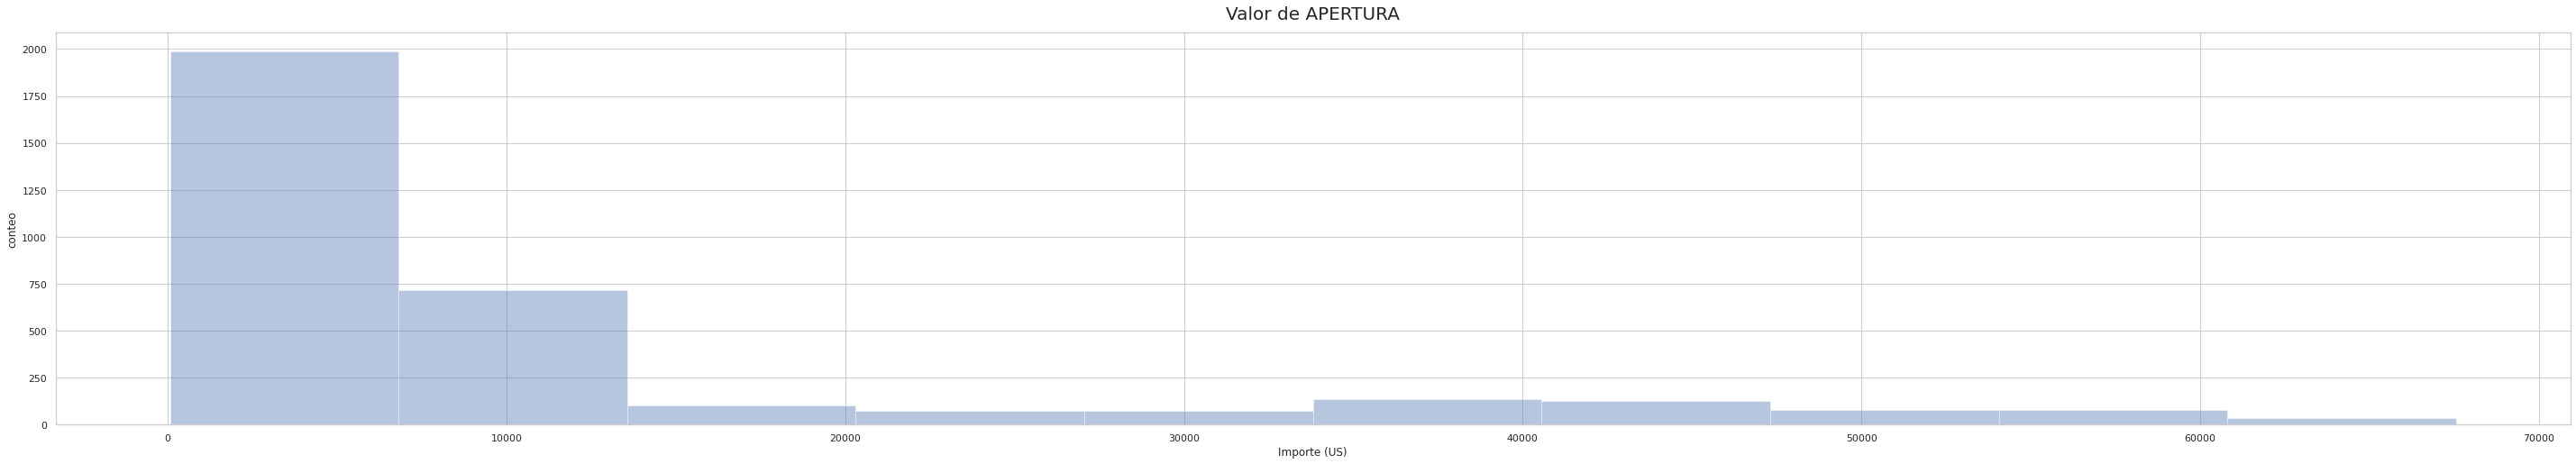

In [279]:
ax_apertura = sns.distplot(data2['apertura'], kde=False, norm_hist=False, bins=segmentos)
ax_apertura.set(xlabel='Importe (US)', ylabel='conteo')
ax_apertura.set_title('Valor de APERTURA', fontsize=20, pad=15);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



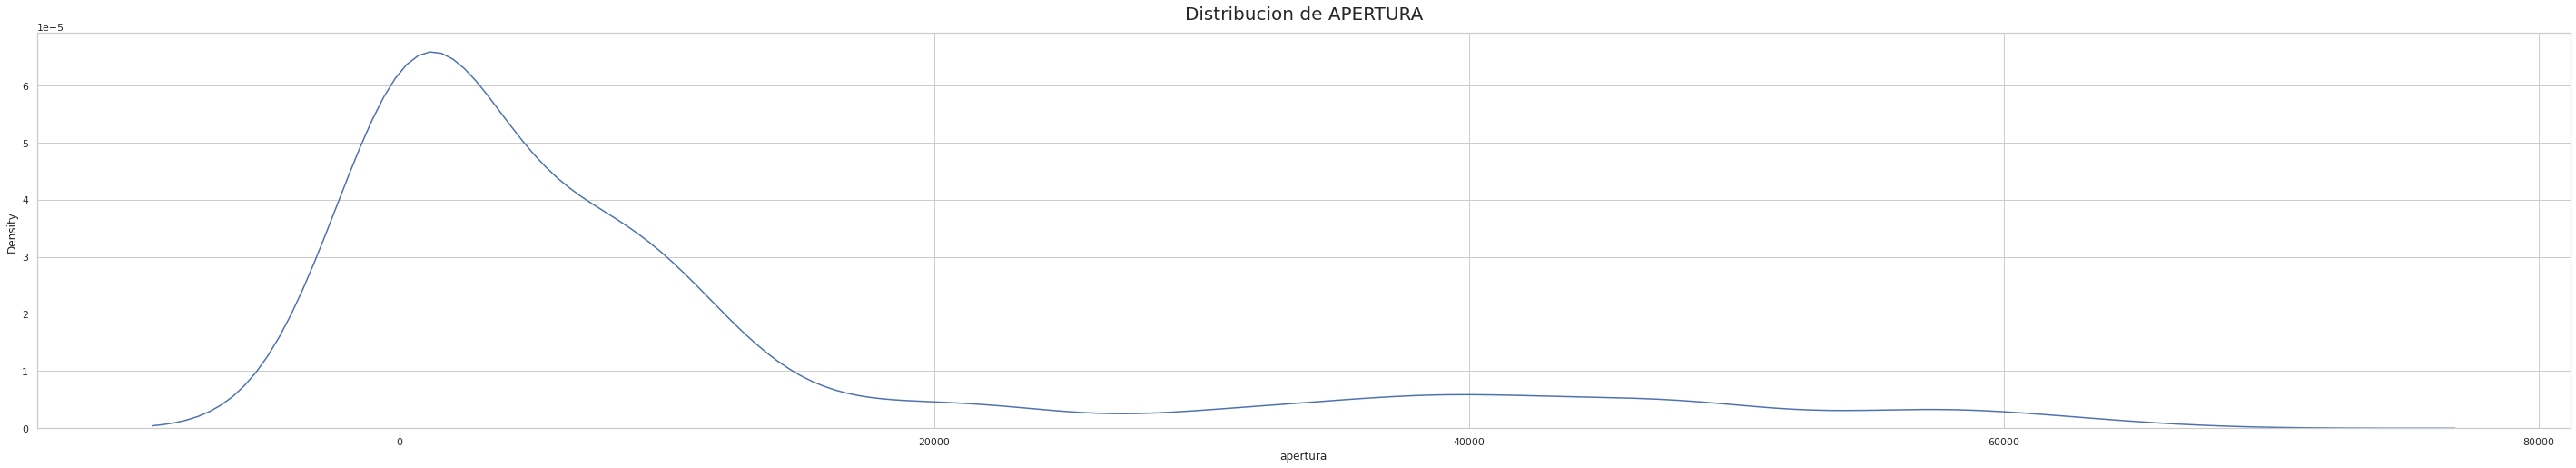

In [280]:
ax_apertura_dis = sns.distplot(data2['apertura'], hist=False)
#ax_apertura_dis.set(xlabel='Importe US', ylabel='conteo')
ax_apertura_dis.set_title('Distribucion de APERTURA', fontsize=20, pad=15);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



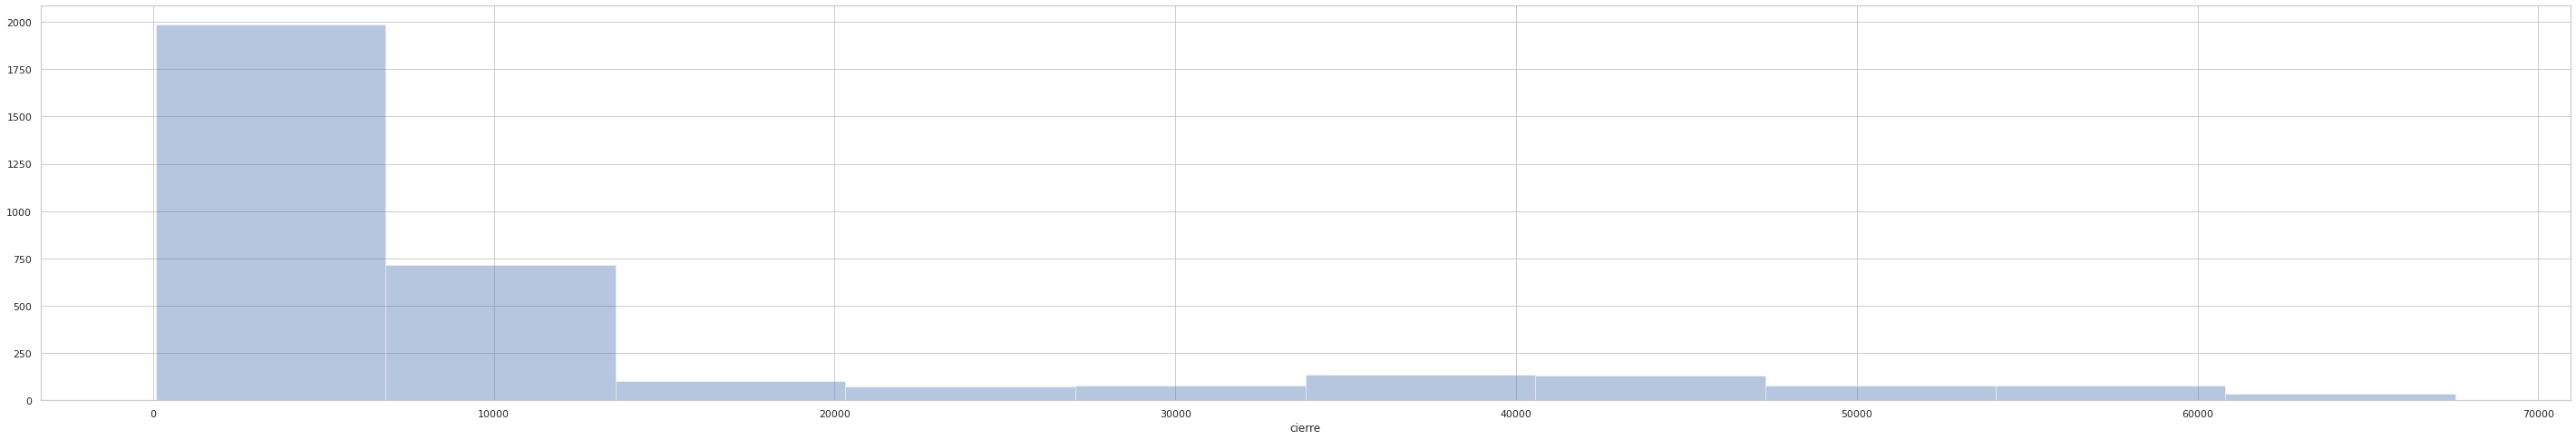

In [281]:
sns.distplot(data2['cierre'], kde=False, norm_hist=False, bins=segmentos)

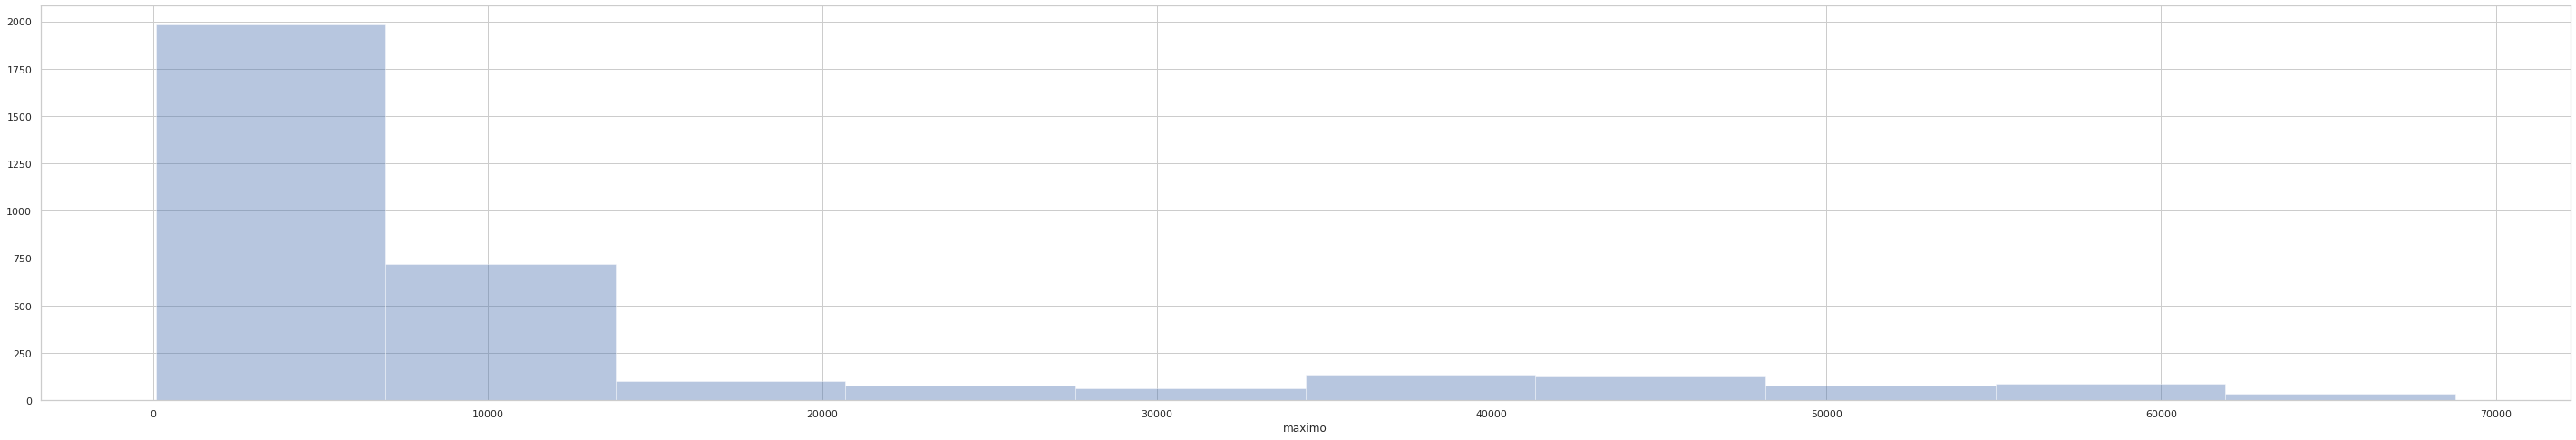

In [282]:
sns.distplot(data2['maximo'], kde=False, norm_hist=False, bins=segmentos)

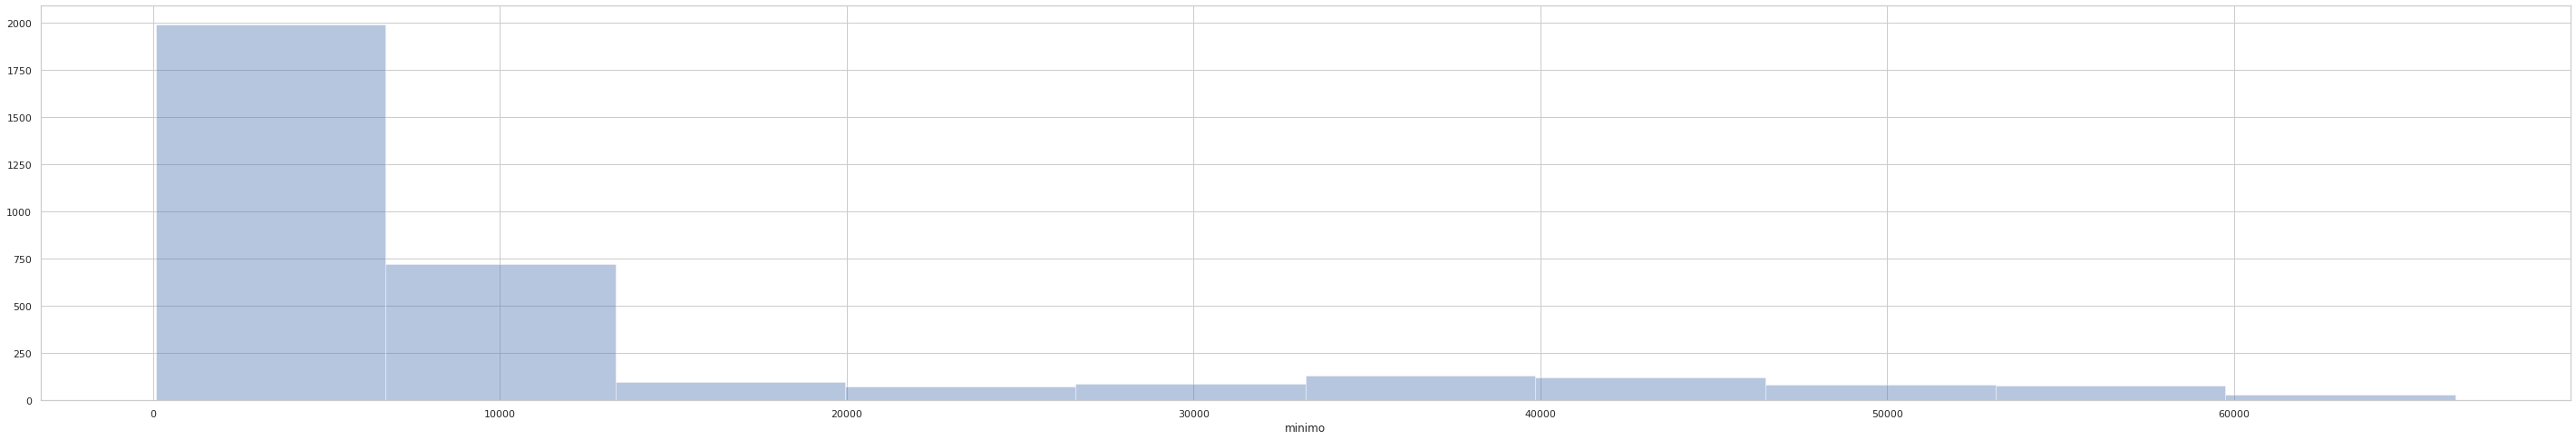

In [283]:
sns.distplot(data2['minimo'], kde=False, norm_hist=False, bins=segmentos)

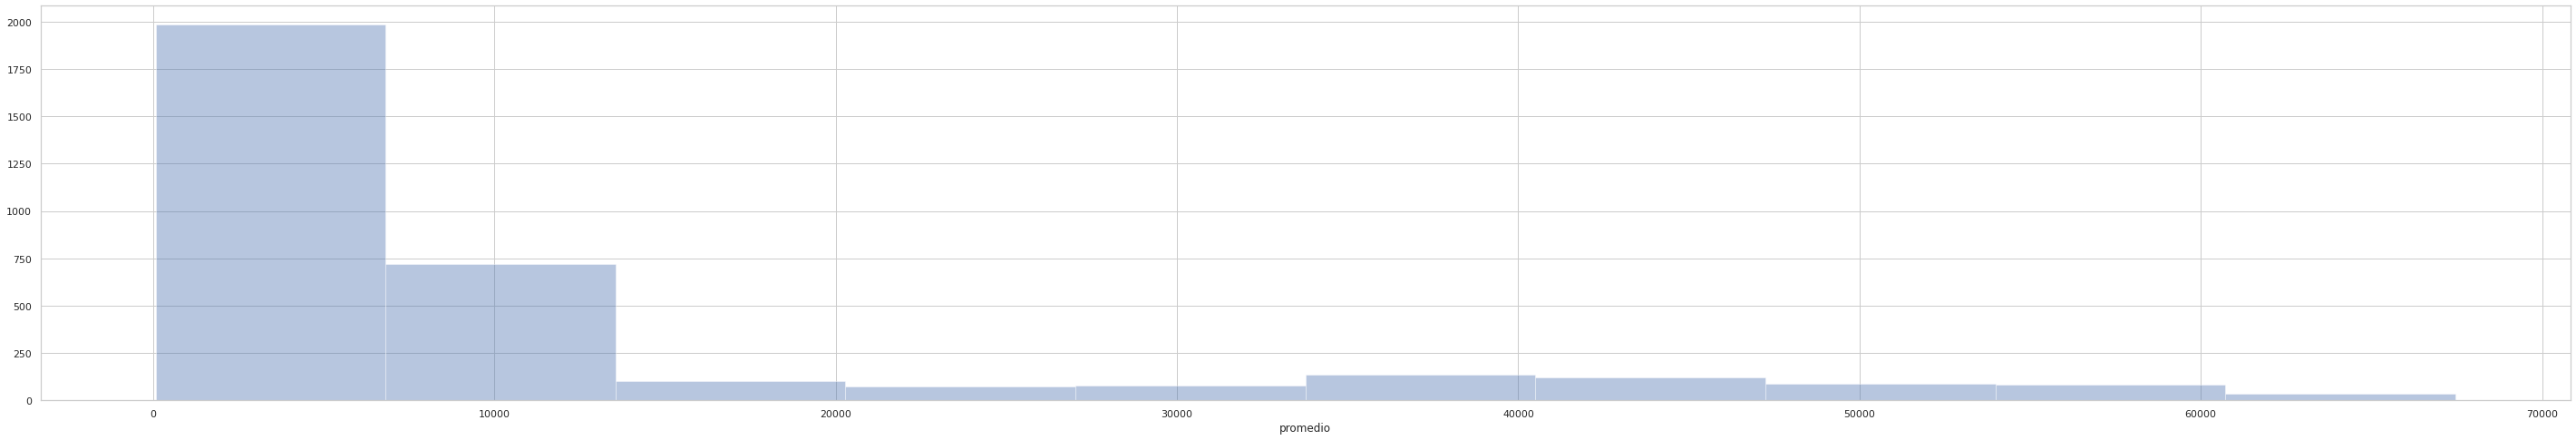

In [284]:
sns.distplot(data2['promedio'], kde=False, norm_hist=False, bins=segmentos)

In [285]:
#Hayamos el precio por año
years=list(data2.index.year.unique())
df_years=pd.DataFrame()
for year in years:
  year_apertura =data2.loc[data2.index.year==year, 'apertura'][0]
  year_cierre   =data2.loc[data2.index.year==year, 'cierre'][-1]
  year_minimo   =data2.loc[data2.index.year==year, 'minimo'].min()
  year_maximo   =data2.loc[data2.index.year==year, 'maximo'].max()
  
  df_years[year] = pd.Series([year_apertura, year_cierre, year_minimo, year_maximo])

df_years=df_years.T.set_axis(['apertura', 'cierre', 'minimo', 'maximo'], axis=1)

# Se calcula el % de cambio entre la apertura y el cierre del año
# ==============================================================================
df_years['year_change'] = 100*(df_years['cierre'] - df_years['apertura']) / df_years['apertura']
df_years

,apertura,cierre,minimo,maximo,year_change
2013,135.300003,754.010010,65.526001,1156.140015,457.287504
2014,754.969971,320.192993,289.295990,1017.119995,-57.588645
2015,320.434998,430.566986,171.509995,495.562012,34.369526
2016,430.721008,963.742981,354.914001,979.396973,123.751097
2017,963.658020,14156.400391,755.755981,20089.000000,1369.027404
2018,14112.200195,3742.700335,3191.303562,17712.400391,-73.478974
2019,3746.713387,7193.598978,3391.023752,13796.489081,91.997579
2020,7194.891971,29001.719822,4106.980750,29244.876688,303.087634
2021,28994.008916,46306.446123,28722.755271,68789.625939,59.710395
2022,46311.744663,20049.763189,17708.623713,48086.836749,-56.706958


In [286]:
candlestick = go.Candlestick(
                    x     = pd.to_datetime(df_years.index, format='%Y'),
                    open  = df_years.apertura,
                    close = df_years.cierre,
                    low   = df_years.minimo,
                    high  = df_years.maximo
                    )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width       = 1600,
    height      = 700,
    title       = dict(text='<b>Grafico Bitcoin/USD por año</b>', font=dict(size=25)),
    yaxis_title = dict(text='Precio (USD)', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20),
    xaxis_rangeslider_visible = False
    )

fig.show()

In [287]:
# Se crea una lista de dicts con las anotaciones de % de cambio para el gráfico
annotations_list = []
max_high = df_years['maximo'].max()

for year in years:
    
    df_aux = df_years.loc[df_years.index == year,]
    loc_x = pd.to_datetime(df_aux.index[0], format='%Y')
    loc_y = df_aux['maximo'].values[0]/max_high + 0.05
    text = '{:.1f}%'.format(df_aux['year_change'].values[0])
    
    annotation = dict(x=loc_x, y=loc_y, 
                      xref='x', yref='paper',
                      showarrow=False, xanchor='center', 
                      text=text)

    annotations_list.append(annotation)

fig.update_layout(annotations = annotations_list)

fig.show()

In [288]:
# Matriz de correlación
df_years.corr()

,apertura,cierre,minimo,maximo,year_change
apertura,1.000000,0.603523,0.841100,0.830349,-0.346177
cierre,0.603523,1.000000,0.845296,0.931496,0.049082
minimo,0.841100,0.845296,1.000000,0.946502,-0.267704
maximo,0.830349,0.931496,0.946502,1.000000,-0.077807
year_change,-0.346177,0.049082,-0.267704,-0.077807,1.000000


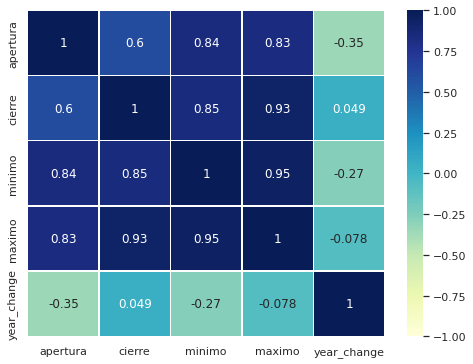

In [289]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_years.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

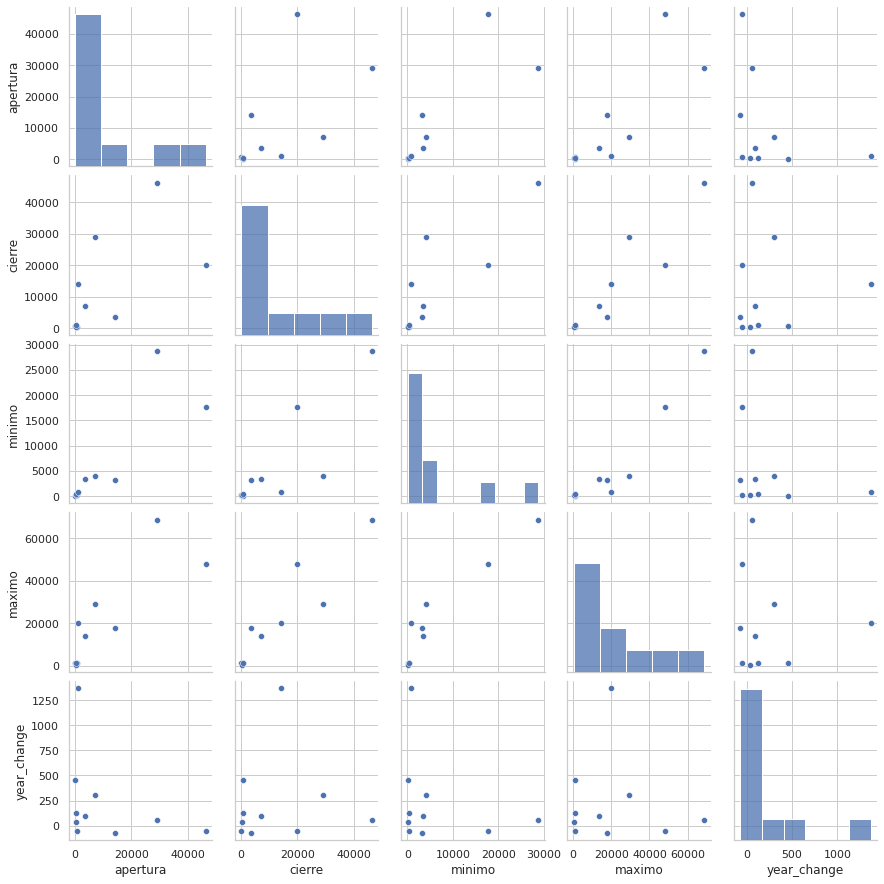

In [290]:
sns.pairplot(df_years);

In [291]:
data2.corr()

,apertura,cierre,maximo,minimo,reward,countdown_halving,promedio
apertura,1.000000,0.998893,0.999561,0.999177,-0.676927,0.239793,0.999596
cierre,0.998893,1.000000,0.999512,0.999429,-0.677279,0.240788,0.999694
maximo,0.999561,0.999512,1.000000,0.999112,-0.676914,0.241166,0.999790
minimo,0.999177,0.999429,0.999112,1.000000,-0.677438,0.238631,0.999765
reward,-0.676927,-0.677279,-0.676914,-0.677438,1.000000,-0.389964,-0.677319
countdown_halving,0.239793,0.240788,0.241166,0.238631,-0.389964,1.000000,0.239987
promedio,0.999596,0.999694,0.999790,0.999765,-0.677319,0.239987,1.000000


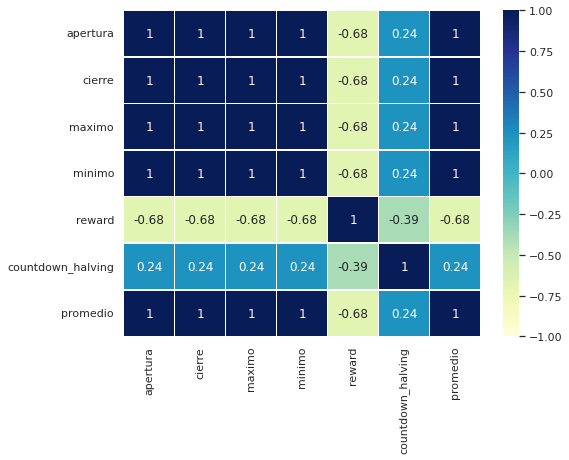

In [292]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

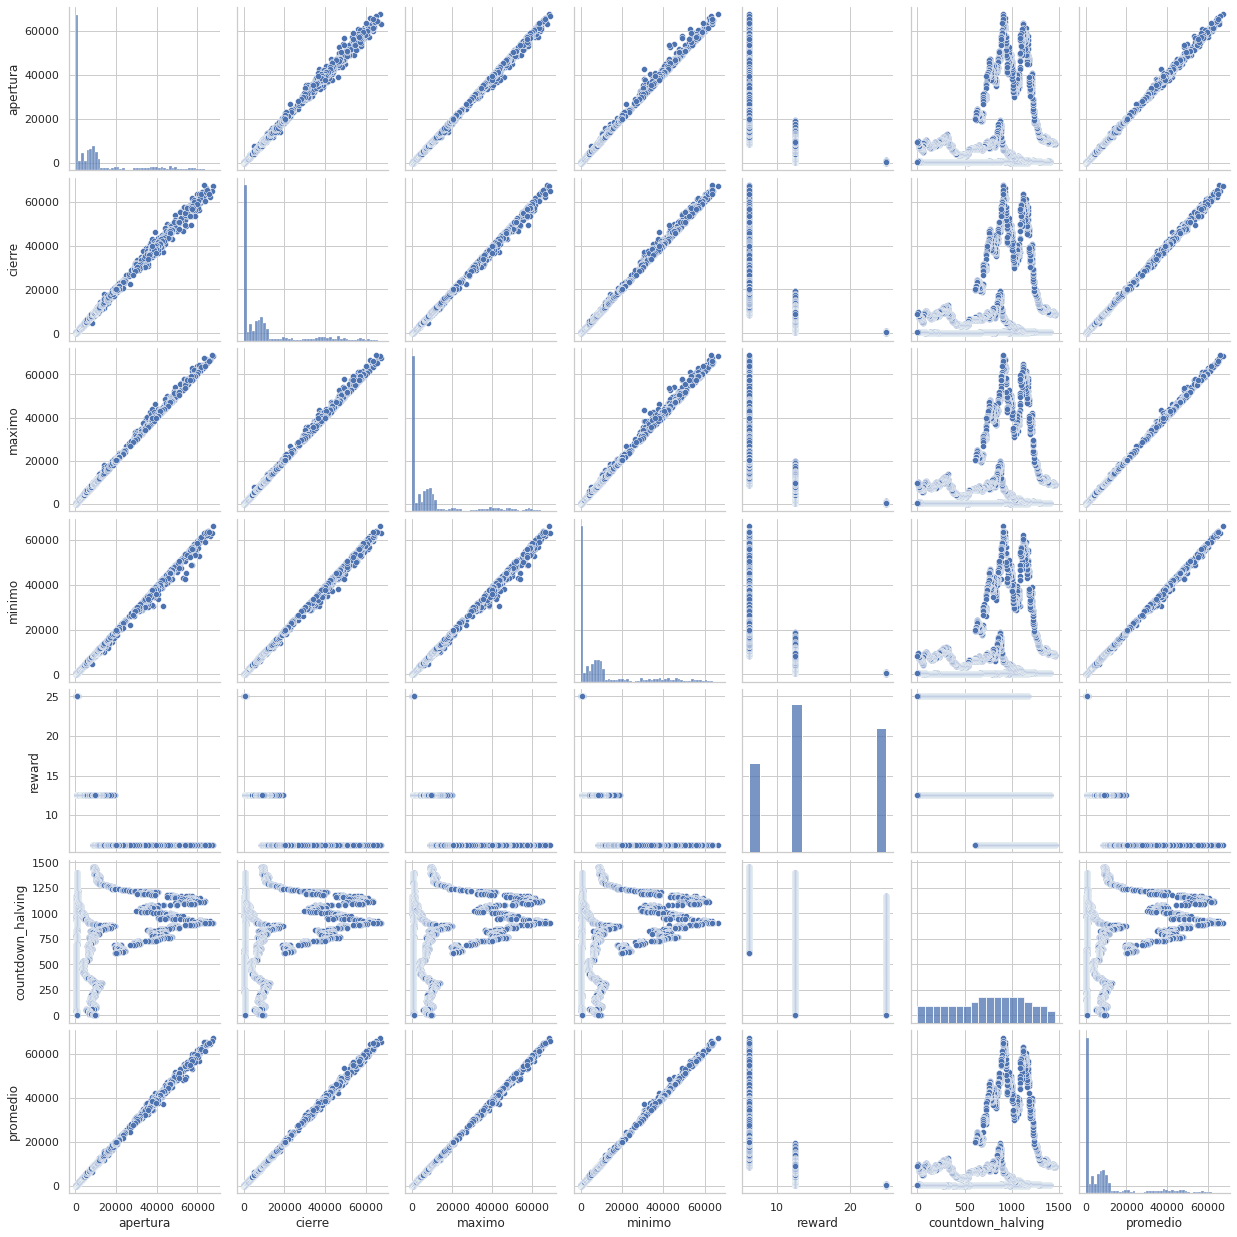

In [309]:
sns.pairplot(data2);

In [ ]:
# Practicamos la regresión lineal
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [310]:
df_years['maximo'].corr(df_years['minimo'])

0.9465018969375347

In [311]:
data2['maximo'].corr(data2['minimo'])

0.9991119324105978

In [313]:
lr=LinearRegression()
lr.fit(df_years['maximo'].to_frame(), df_years['minimo'])
y_predict = lr.predict(df_years['maximo'].to_frame())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



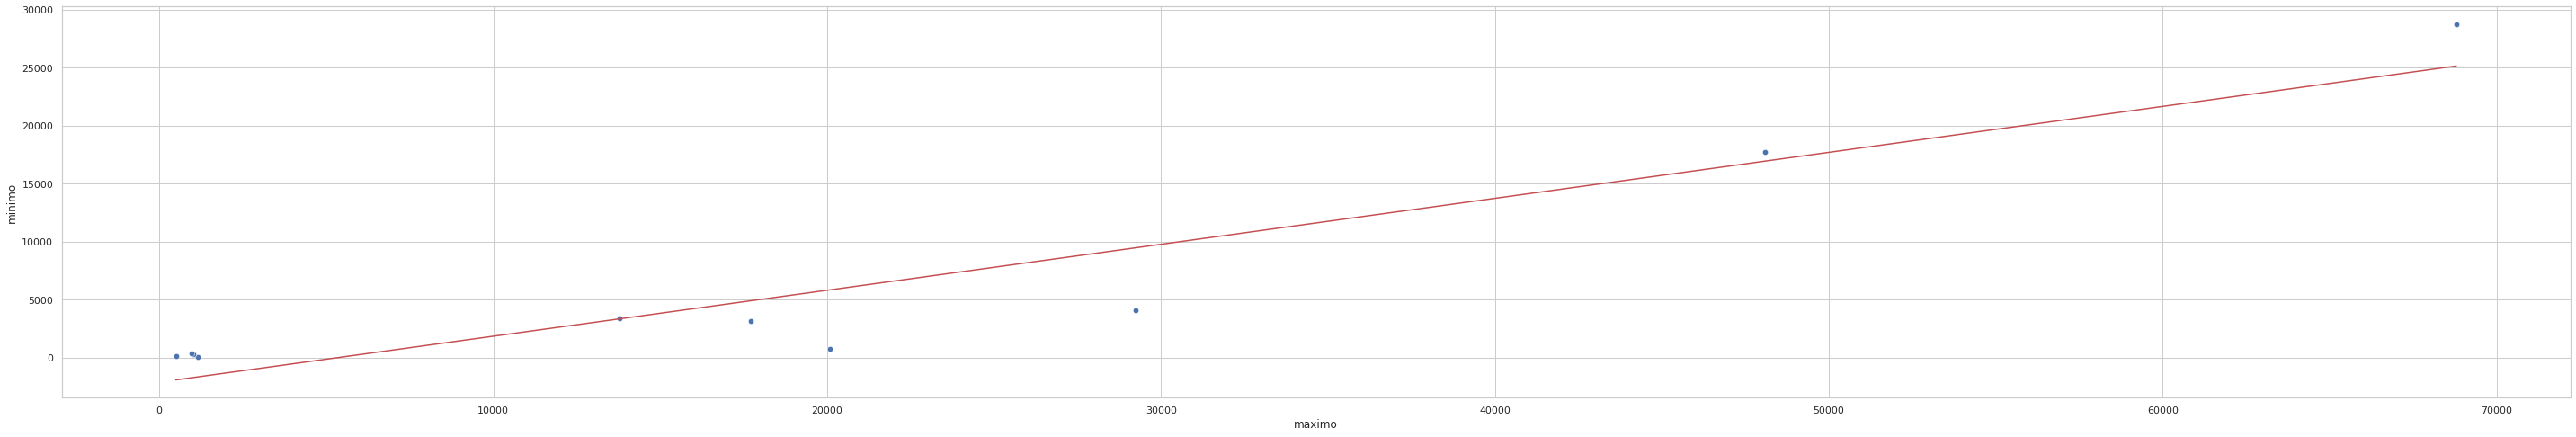

In [314]:
sns.scatterplot(df_years['maximo'], df_years['minimo'], s=40);
#sns.scatterplot(df_years['maximo'], y_predict, color='r', s=40);
sns.lineplot(df_years['maximo'], y_predict, color='r');

In [315]:
lr.score(df_years['maximo'].to_frame(), df_years['minimo'])

0.8958658409063519

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



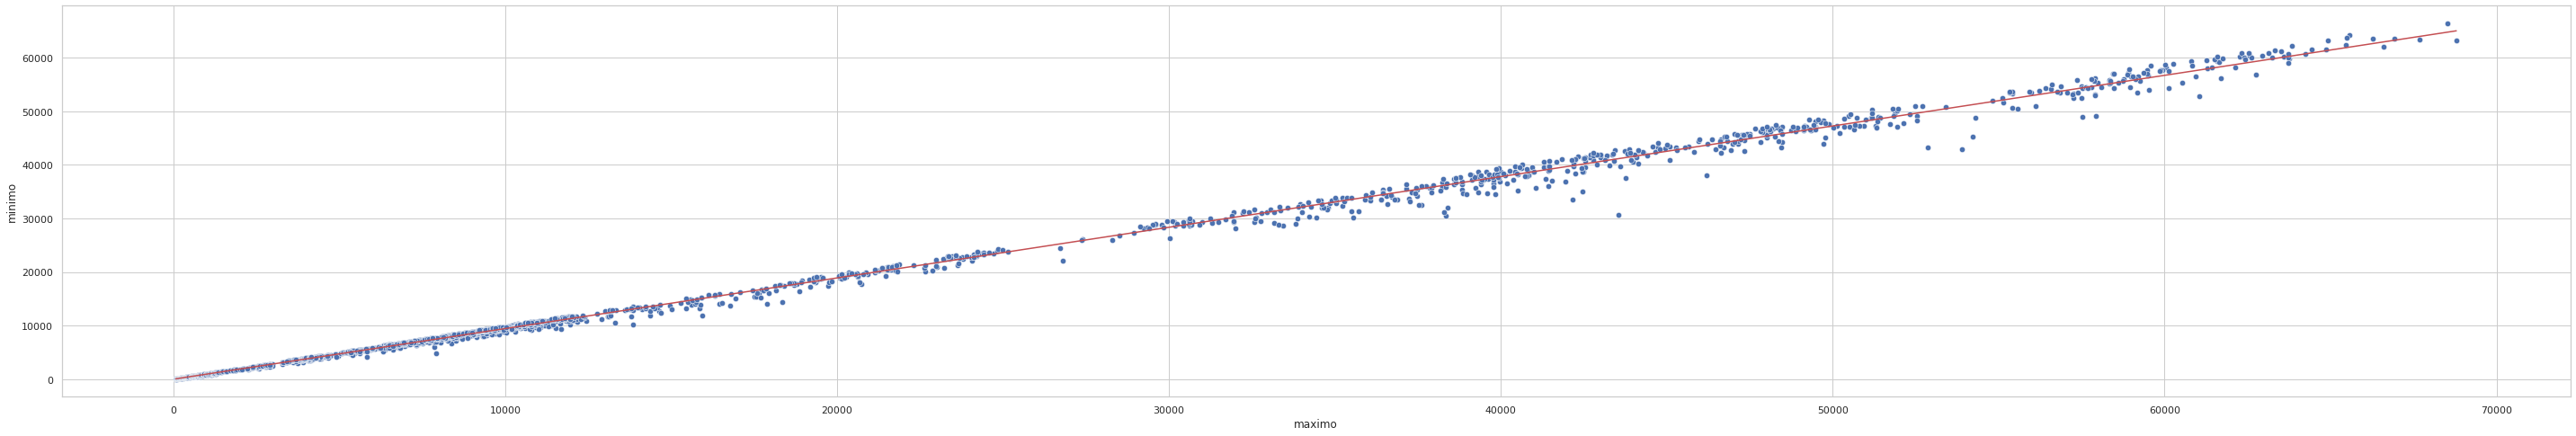

In [316]:
lr.fit(data2['maximo'].to_frame(), data2['minimo'])
y_predict = lr.predict(data2['maximo'].to_frame())
sns.scatterplot(data2['maximo'], data2['minimo'], s=40);
sns.lineplot(data2['maximo'], y_predict, color='r');

In [317]:
lr.score(data2['maximo'].to_frame(), data2['minimo'])

0.9982246534852385

In [302]:
# Bootstrap para data2
dit={}
for col in data2.drop(['reward', 'countdown_halving'], axis=1).columns:
  means=[]
  for i in range(100_000):
    sample = data2[col].sample(n=50, replace=True)
    means.append(sample.mean())
  dit.update({col:pd.Series(means)})

df_bootstrap=pd.DataFrame.from_dict(dit)

In [303]:
df_bootstrap

,apertura,cierre,maximo,minimo,promedio
0,7540.449193,7495.957852,9498.409104,11860.657253,12521.548235
1,12702.933480,10719.009048,12599.457996,10912.148649,14961.538266
2,10854.148181,9388.623799,14606.119666,11393.483531,8209.003633
3,13682.936285,9508.982262,10671.254214,10085.307619,6159.984501
4,18068.593478,8341.907751,8104.251318,11143.290009,8807.263124
...,...,...,...,...,...
99995,9759.273922,12071.701785,12095.049884,8974.865054,11420.545983
99996,11447.217134,7518.481679,13932.751958,12094.690156,12853.171212
99997,8547.859402,12968.145428,10182.224325,12305.872489,14451.894399
99998,8423.266286,11301.258737,9022.927916,8364.916939,12040.279530


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, '')

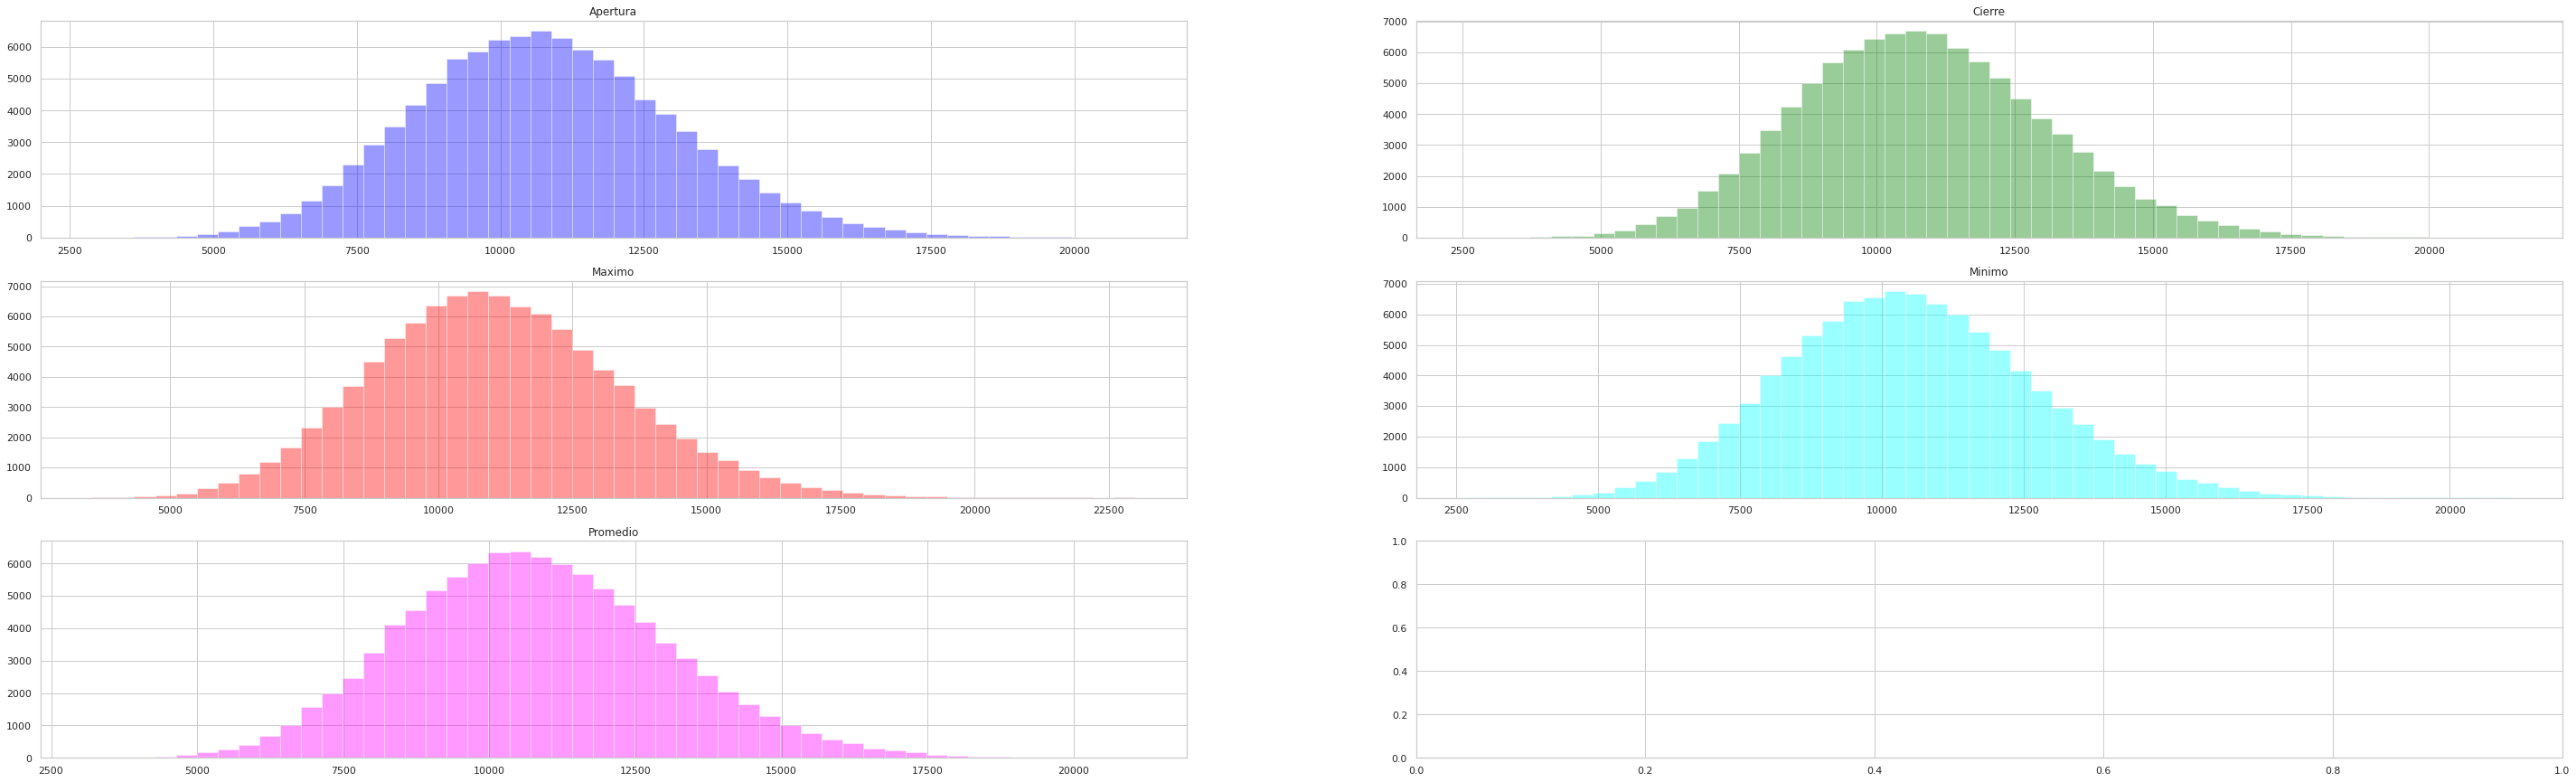

In [304]:
colores = ['blue','green','red','cyan','magenta','yellow','black','white']
#define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(50, 15))
#create boxplot in each subplot
sns.distplot(df_bootstrap['apertura'], kde=False, norm_hist=False, ax=axes[0,0], color=colores[0]);
sns.distplot(df_bootstrap['cierre'], kde=False, norm_hist=False, ax=axes[0,1], color=colores[1]);
sns.distplot(df_bootstrap['maximo'], kde=False, norm_hist=False, ax=axes[1,0], color=colores[2]);
sns.distplot(df_bootstrap['minimo'], kde=False, norm_hist=False, ax=axes[1,1], color=colores[3]);
sns.distplot(df_bootstrap['promedio'], kde=False, norm_hist=False, ax=axes[2,0], color=colores[4]);
axes[0,0].set_title('Apertura')
axes[0,0].set_xlabel('')
axes[0,1].set_title('Cierre')
axes[0,1].set_xlabel('')
axes[1,0].set_title('Maximo')
axes[1,0].set_xlabel('')
axes[1,1].set_title('Minimo')
axes[1,1].set_xlabel('')
axes[2,0].set_title('Promedio')
axes[2,0].set_xlabel('')


In [318]:
# Calculo del Error estandar e Intervalo de confianza
estadisticos={}

for col in df_bootstrap.columns:
  temp={}
  temp.update({'Error estandar' : df_bootstrap[col].std()})
  temp.update({'Valor mínimo' : df_bootstrap[col].min()})
  temp.update({'Valor máximo' : df_bootstrap[col].max()})
  temp.update({'Rango' : df_bootstrap[col].max()-df_bootstrap[col].min()})
  temp.update({'Limite inferior' : df_bootstrap[col].quantile(0.05)})
  temp.update({'Limite superior' : df_bootstrap[col].quantile(0.95)})
  temp.update({'Intervalo de 90% confianza de la media': str(df_bootstrap[col].mean())+' +/- '+str(((df_bootstrap[col].mean() - df_bootstrap[col].quantile(0.025)) + (df_bootstrap[col].quantile(0.975) - df_bootstrap[col].mean())) / 2)})
  estadisticos.update({col : temp})
df_estadisticos=pd.DataFrame.from_dict(estadisticos)
df_estadisticos.T
#std={'Error estandar':std}
#df_std=pd.DataFrame.from_dict(std)
#df_std

,Error estandar,Valor mínimo,Valor máximo,Rango,Limite inferior,Limite superior,Intervalo de 90% confianza de la media
apertura,2240.425042,2897.376608,21041.682178,18144.30557,7297.418704,14644.077159,10800.49301909411 +/- 4358.873627394193
cierre,2232.003646,2598.467608,21467.95245,18869.484843,7304.445234,14633.82391,10808.807654550857 +/- 4354.019105590744
maximo,2291.156977,3550.115748,22983.994356,19433.878608,7495.432232,15028.417171,11087.925605289345 +/- 4487.881286583294
minimo,2169.994254,2712.426161,21064.920841,18352.49468,7081.044558,14210.316011,10496.363460676243 +/- 4235.90465422711
promedio,2236.081562,3208.760236,21044.668384,17835.908148,7286.786295,14636.84821,10797.564045339559 +/- 4367.523578162123


In [ ]:
df_estadisticos['apertura']['Limite inferior']

In [ ]:
sns.displot(data = df_bootstrap['apertura'], color=colores[0], ax=2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: Futur

Text(0.5, 0, '')

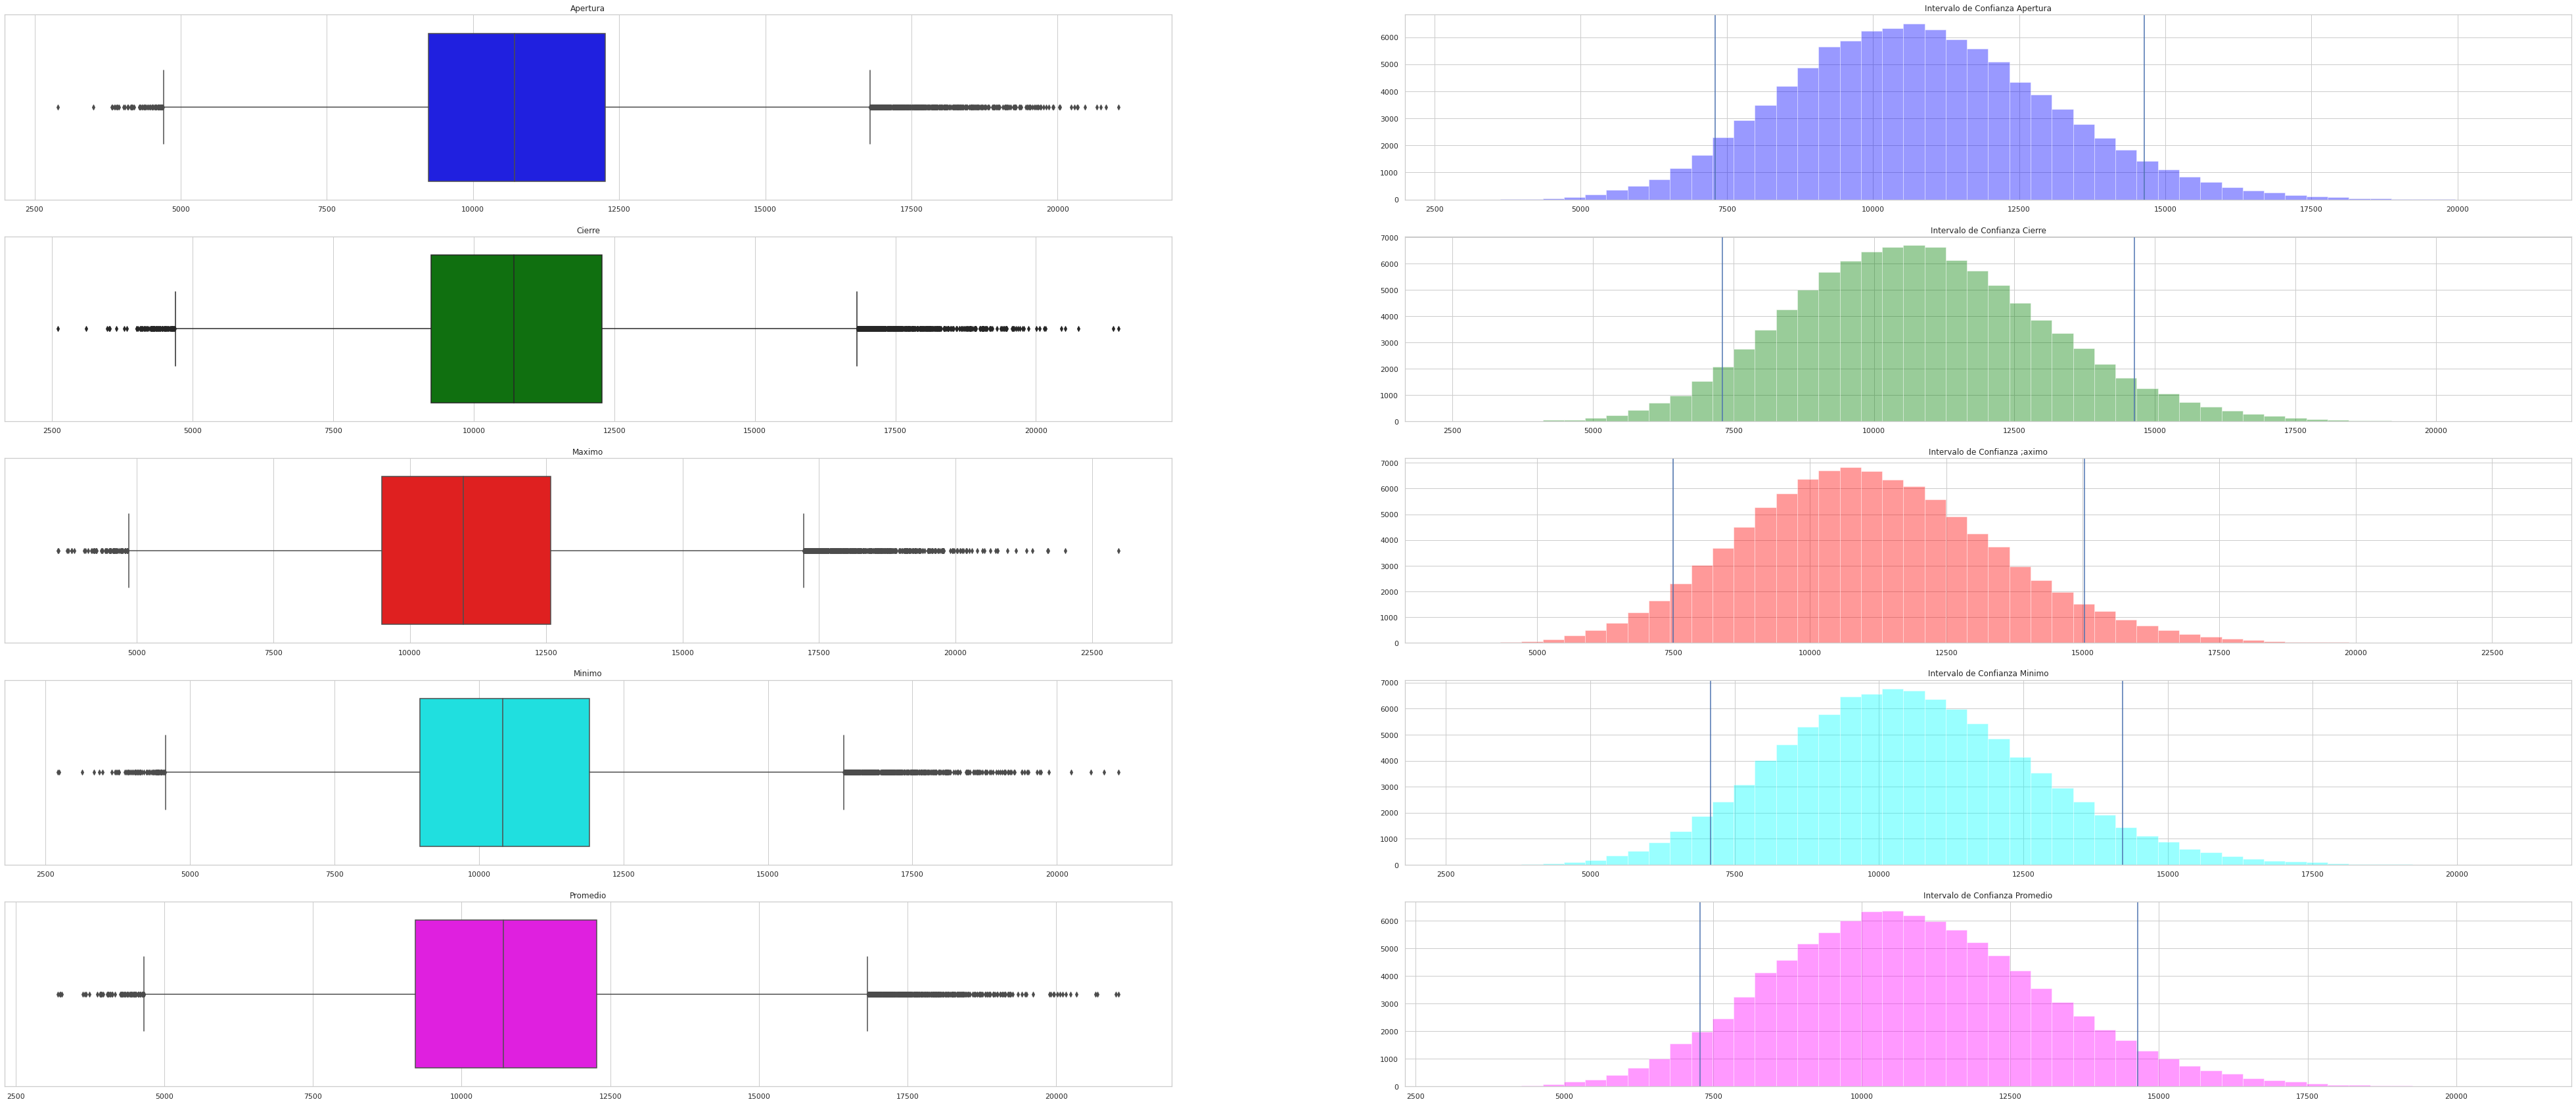

In [319]:
fig, axes = plt.subplots(5, 2, figsize=(70, 30))
sns.boxplot(df_bootstrap['apertura'],ax=axes[0,0], color=colores[0])
axes[0,0].set_title('Apertura')
axes[0,0].set_xlabel('')
sns.distplot(df_bootstrap['apertura'], kde=False, norm_hist=False, ax=axes[0,1], color=colores[0]);
axes[0,1].axvline(df_estadisticos['apertura']['Limite inferior'])
axes[0,1].axvline(df_estadisticos['apertura']['Limite superior'])
axes[0,1].set_title('Intervalo de Confianza Apertura')
axes[0,1].set_xlabel('')


sns.boxplot(df_bootstrap['cierre'], ax=axes[1,0], color=colores[1]);
axes[1,0].set_title('Cierre')
axes[1,0].set_xlabel('')
sns.distplot(df_bootstrap['cierre'], kde=False, norm_hist=False, ax=axes[1,1], color=colores[1]);
axes[1,1].axvline(df_estadisticos['cierre']['Limite inferior'])
axes[1,1].axvline(df_estadisticos['cierre']['Limite superior'])
axes[1,1].set_title('Intervalo de Confianza Cierre')
axes[1,1].set_xlabel('')

sns.boxplot(df_bootstrap['maximo'], ax=axes[2,0], color=colores[2]);
axes[2,0].set_title('Maximo')
axes[2,0].set_xlabel('')
sns.distplot(df_bootstrap['maximo'], kde=False, norm_hist=False, ax=axes[2,1], color=colores[2]);
axes[2,1].axvline(df_estadisticos['maximo']['Limite inferior'])
axes[2,1].axvline(df_estadisticos['maximo']['Limite superior'])
axes[2,1].set_title('Intervalo de Confianza ;aximo')
axes[2,1].set_xlabel('')

sns.boxplot(df_bootstrap['minimo'], ax=axes[3,0], color=colores[3]);
axes[3,0].set_title('Minimo')
axes[3,0].set_xlabel('')
sns.distplot(df_bootstrap['minimo'], kde=False, norm_hist=False, ax=axes[3,1], color=colores[3]);
axes[3,1].axvline(df_estadisticos['minimo']['Limite inferior'])
axes[3,1].axvline(df_estadisticos['minimo']['Limite superior'])
axes[3,1].set_title('Intervalo de Confianza Minimo')
axes[3,1].set_xlabel('')

sns.boxplot(df_bootstrap['promedio'], ax=axes[4,0], color=colores[4]);
axes[4,0].set_title('Promedio')
axes[4,0].set_xlabel('')
sns.distplot(df_bootstrap['promedio'], kde=False, norm_hist=False, ax=axes[4,1], color=colores[4]);
axes[4,1].axvline(df_estadisticos['promedio']['Limite inferior'])
axes[4,1].axvline(df_estadisticos['promedio']['Limite superior'])
axes[4,1].set_title('Intervalo de Confianza Promedio')
axes[4,1].set_xlabel('')

